<a href="https://colab.research.google.com/github/Valuery/Japanese-License-Plate/blob/main/test_15032022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
basepath = '/content/drive/MyDrive/RecognitionCRNN/Recognition_CRNN_KERAS'

In [ ]:
import sys 
sys.path.append(basepath)

In [ ]:
!cd $basepath

In [ ]:
import cv2
import itertools, os, time
import numpy as np
from Model import get_Model
from parameter import letters
import argparse
from tensorflow.keras import backend as K
K.set_learning_phase(0)

/usr/local/lib/python3.7/dist-packages/keras/backend.py:450: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn('`tf.keras.backend.set_learning_phase` is deprecated and '


In [ ]:
def decode_label(out):
    # out : (1, 32, 42)
    out_best = list(np.argmax(out[0, 2:], axis=1))  # get max index -> len = 32
    out_best = [k for k, g in itertools.groupby(out_best)]  # remove overlap value
    #print(out_best)
    outstr = ''
    for i in out_best:
        if i < len(letters):
            #print("->" + letters[i])
            outstr += letters[i]
    return outstr

In [ ]:
def process_image(image):
    img = cv2.imread(image, cv2.IMREAD_GRAYSCALE)
    img_pred = img.astype(np.float32)
    img_pred = cv2.resize(img_pred, (128, 64))
    img_pred = (img_pred / 255.0) * 2.0 - 1.0
    img_pred = img_pred.T
    img_pred = np.expand_dims(img_pred, axis=-1)
    img_pred = np.expand_dims(img_pred, axis=0)
    return img_pred

In [ ]:
def edit_distance(s1, s2):
    m=len(s1)+1
    n=len(s2)+1

    tbl = {}
    for i in range(m): tbl[i,0]=i
    for j in range(n): tbl[0,j]=j
    for i in range(1, m):
        for j in range(1, n):
            cost = 0 if s1[i-1] == s2[j-1] else 1
            tbl[i,j] = min(tbl[i, j-1]+1, tbl[i-1, j]+1, tbl[i-1, j-1]+cost)

    return tbl[i,j]

In [ ]:
cd /content/drive/MyDrive/RecognitionCRNN/Recognition_CRNN_KERAS

/content/drive/MyDrive/RecognitionCRNN/Recognition_CRNN_KERAS


# **CHECK TẤT CẢ CÁC CHECKPOINT VỚI TẬP DỮ LIỆU**

## **Check result train_image**

In [ ]:
checkpoint_path = os.path.join(basepath, 'training_2/')
checkpoint_file = os.listdir(checkpoint_path)

In [ ]:
len(checkpoint_file)

5

In [ ]:
train_real_dataset_path = os.path.join(basepath, 'dataset/Pipeline_train_and_test/train-real-dataset-area/')
image_test_file = os.listdir(train_real_dataset_path)
path_test_image = train_real_dataset_path

In [ ]:
CER_CHECKPOINT_TRAIN = []
for checkpoint in checkpoint_file:
  path = checkpoint_path + checkpoint
  model = get_Model(training=False)
  model.load_weights(path)
  sum_cer = []
  total = 0
  acc = 0
  letter_total = 0
  letter_acc = 0
  for image in image_test_file:
      # choice = random.randint(0,9999)
      path = path_test_image + image
      
      img_pred = process_image(path)
      net_out_value = model.predict(img_pred)
      pred_texts = decode_label(net_out_value)
      newstr = pred_texts.replace("Z", "")

      # label = image_test_file[i][0: len(image_test_file[i])-4]

      string = ''
      for j in range(3):
          if image[j]>='0' and image[j]<='9':
            continue
          else:
            string += image[j]
      if string.endswith('p'): string = string.rstrip(string[-1])
      if string.endswith('.'): string = string.rstrip(string[-1])
      # print('Predicted: '+newstr +" "+'Label: '+string)
      cer = edit_distance(newstr, string)
      error = cer/max(len(newstr), len(string))
      

      for i in range(min(len(newstr), len(string))):
      #ti = test_img[i][:-9]
          if newstr[i] == string[i]:
              letter_acc += 1
      letter_total += max(len(newstr), len(string))
      if newstr == string:
          acc += 1
      total += 1
      sum_cer.append(error)
  cer_rate = sum(sum_cer) / len(image_test_file)
  CER_CHECKPOINT_TRAIN.append(cer_rate)
  print("CER_TRAIN_{}: ".format(str(checkpoint)),cer_rate)
  print("ACC_TRAIN_{}: ".format(str(checkpoint)), acc / total)
  print("letter ACC_TRAIN_{}: ".format(str(checkpoint)), letter_acc / letter_total)

CER_TRAIN_cp-0280.hdf5:  0.015151515151515152
ACC_TRAIN_cp-0280.hdf5:  0.9696969696969697
letter ACC_TRAIN_cp-0280.hdf5:  0.9857142857142858
CER_TRAIN_cp-0240.hdf5:  0.29797979797979796
ACC_TRAIN_cp-0240.hdf5:  0.5252525252525253
letter ACC_TRAIN_cp-0240.hdf5:  0.6523809523809524
CER_TRAIN_cp-0220.hdf5:  0.6683501683501681
ACC_TRAIN_cp-0220.hdf5:  0.1111111111111111
letter ACC_TRAIN_cp-0220.hdf5:  0.2761904761904762


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-16-95b1d91e6397>", line 16, in <module>
    net_out_value = model.predict(img_pred)
  File "/usr/local/lib/python3.7/dist-packages/keras/utils/traceback_utils.py", line 64, in error_handler
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/keras/engine/training.py", line 1961, in predict
    steps_per_execution=self._steps_per_execution)
  File "/usr/local/lib/python3.7/dist-packages/keras/engine/data_adapter.py", line 1399, in get_data_handler
    return DataHandler(*args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/keras/engine/data_adapter.py", line 1161, in __init__
    model=model)
  File "/usr/local/lib/python3.7/dist-packages/keras/engine/data_adapter.py", line 326, in __init__
    indices_dataset = indices_dataset.flat_map(s

KeyboardInterrupt: ignored

## **Check result val_image**

In [ ]:
checkpoint_path ='/content/drive/MyDrive/Recognition CRNN/Recognition part. CRNN KERAS/training_2/'
checkpoint_file = os.listdir(checkpoint_path)

NameError: ignored

In [ ]:
len(checkpoint_file)

NameError: ignored

In [ ]:
test_real_dataset_path = os.path.join(basepath, 'dataset/Pipeline_train_and_test/val_real_dataset/')
image_test_file = os.listdir(test_real_dataset_path)
path_test_image = test_real_dataset_path

In [ ]:
CER_CHECKPOINT_VAL = []
for checkpoint in checkpoint_file:
  path = checkpoint_path + checkpoint
  model = get_Model(training=False)
  model.load_weights(path)
  sum_cer = []
  total = 0
  acc = 0
  letter_total = 0
  letter_acc = 0
  for image in image_test_file:
      # choice = random.randint(0,9999)
      path = path_test_image + image
      
      img_pred = process_image(path)
      net_out_value = model.predict(img_pred)
      pred_texts = decode_label(net_out_value)
      newstr = pred_texts.replace("Z", "")

      # label = image_test_file[i][0: len(image_test_file[i])-4]

      string = ''
      for j in range(3):
          if image[j]>='0' and image[j]<='9':
            continue
          else:
            string += image[j]
      if string.endswith('p'): string = string.rstrip(string[-1])
      if string.endswith('.'): string = string.rstrip(string[-1])
      # print('Predicted: '+newstr +" "+'Label: '+string)
      cer = edit_distance(newstr, string)
      error = cer/max(len(newstr), len(string))
      

      for i in range(min(len(newstr), len(string))):
      #ti = test_img[i][:-9]
          if newstr[i] == string[i]:
              letter_acc += 1
      letter_total += max(len(newstr), len(string))
      if newstr == string:
          acc += 1
      total += 1
      sum_cer.append(error)
  cer_rate = sum(sum_cer) / len(image_test_file)
  CER_CHECKPOINT_VAL.append(cer_rate)
  print("CER_VAL_{}: ".format(str(checkpoint)),cer_rate)
  print("ACC_VAL_{}: ".format(str(checkpoint)), acc / total)
  print("letter ACC_VAL{}: ".format(str(checkpoint)), letter_acc / letter_total)

## **Lưu kết quả các checkpoint trên toàn bộ tập dữ liệu train và val**

In [ ]:
import csv
HEADER = ['CP20', 'CP40', 'CP60', 'CP80', 'CP100', 'CP120', 'CP140', 'CP160', 'CP180', 'CP200']
DATA = [
        CER_CHECKPOINT_TRAIN,
        CER_CHECKPOINT_VAL,
]

with open('/content/drive/MyDrive/Recognition CRNN/Recognition part. CRNN KERAS/result.csv', 'w', encoding='UTF8', newline='') as f:
    writer = csv.writer(f)

    writer.writerow(HEADER)

    writer.writerows(DATA)

**Chạy kết quả trên từng class riêng biệt trên tập train, cụ thể là CP120:**

# **CHECK CP120 CHO TỪNG CLASS RIÊNG BIỆT TRONG TẬP DỮ LIỆU TRAIN VÀ VAL**

In [ ]:
train_real_classify_path = '/content/drive/MyDrive/RecognitionCRNN/Recognition_CRNN_KERAS/dataset/Pipeline_train_and_test/train_real_dataset_classify/'
train_real_classify_folder = os.listdir(train_real_classify_path)
len(train_real_classify_folder)

38

In [ ]:
keys = []
values = []
for folder in train_real_classify_folder:
  path = train_real_classify_path + folder
  keys.append(folder)
  values.append(len(os.listdir(path)))

In [ ]:
dictionary_train = dict(zip(keys, values))
dictionary_train

{'なにわ': 5,
 '三重': 1,
 '京': 1,
 '京都': 14,
 '八戸': 1,
 '八王子': 1,
 '千葉': 3,
 '名古屋': 2,
 '和歌山': 1,
 '和泉': 2,
 '品川': 5,
 '多摩': 3,
 '大宮': 2,
 '大阪': 7,
 '奈良': 2,
 '姫路': 2,
 '宇都宮': 1,
 '宮城': 1,
 '富山': 1,
 '山梨': 1,
 '岡山': 1,
 '川崎': 1,
 '所沢': 2,
 '春日部': 1,
 '横浜': 4,
 '水戸': 2,
 '沖': 1,
 '沼津': 1,
 '滋賀': 3,
 '熊谷': 1,
 '相模': 5,
 '神戸': 6,
 '練馬': 1,
 '群馬': 4,
 '習志野': 3,
 '足立': 4,
 '長野': 1,
 '静岡': 2}

In [ ]:
keys

['なにわ',
 '三重',
 '京',
 '京都',
 '八戸',
 '八王子',
 '千葉',
 '名古屋',
 '和歌山',
 '和泉',
 '品川',
 '多摩',
 '大宮',
 '大阪',
 '奈良',
 '姫路',
 '宇都宮',
 '宮城',
 '富山',
 '山梨',
 '岡山',
 '川崎',
 '所沢',
 '春日部',
 '横浜',
 '水戸',
 '沖',
 '沼津',
 '滋賀',
 '熊谷',
 '相模',
 '神戸',
 '練馬',
 '群馬',
 '習志野',
 '足立',
 '長野',
 '静岡']

In [ ]:
val_real_classify_path = '/content/drive/MyDrive/RecognitionCRNN/Recognition_CRNN_KERAS/dataset/Pipeline_train_and_test/val_real_dataset_classify/'
val_real_classify_folder = os.listdir(val_real_classify_path)
len(val_real_classify_folder)

10

In [ ]:
keys_val = []
values_val = []
for folder in val_real_classify_folder:
  path = val_real_classify_path + folder
  keys_val.append(folder)
  values_val.append(len(os.listdir(path)))

In [ ]:
dictionary = dict(zip(keys_val, values_val))
dictionary

{'なにわ': 1,
 '京都': 2,
 '八王子': 1,
 '名古屋': 1,
 '多摩': 1,
 '大阪': 1,
 '春日部': 1,
 '練馬': 2,
 '群馬': 1,
 '足立': 1}

In [ ]:
keys_val

['なにわ', '京都', '八王子', '名古屋', '多摩', '大阪', '春日部', '練馬', '群馬', '足立']

In [ ]:
#/content/drive/MyDrive/Recognition CRNN/Recognition part. CRNN KERAS/training_2/cp-0120.hdf5
model = get_Model(training=False)
model.load_weights('/content/drive/MyDrive/RecognitionCRNN/Recognition_CRNN_KERAS/training_2/cp-0120.hdf5')

In [ ]:
dict_val_for_train = {}
for folder in train_real_classify_folder:
  path = train_real_classify_path + folder
  path_image = os.listdir(path)
  sum_cer = []
  total = 0
  acc = 0
  letter_total = 0
  letter_acc = 0
  # CER_CHECKPOINT_TRAIN_FOR_CLASS = []
  for image in path_image:
    path_img = path +'/'+image

    img_pred = process_image(path_img)
    net_out_value = model.predict(img_pred)
    pred_texts = decode_label(net_out_value)
    newstr = pred_texts.replace("Z", "")

    # label = image_test_file[i][0: len(image_test_file[i])-4]

    string = ''
    for j in range(3):
        if image[j]>='0' and image[j]<='9':
          continue
        else:
          string += image[j]
    if string.endswith('p'): string = string.rstrip(string[-1])
    if string.endswith('.'): string = string.rstrip(string[-1])
    # print('Predicted: '+newstr +" "+'Label: '+string)
    cer = edit_distance(newstr, string)
    error = cer/max(len(newstr), len(string))
    

    for i in range(min(len(newstr), len(string))):
    #ti = test_img[i][:-9]
        if newstr[i] == string[i]:
            letter_acc += 1
    letter_total += max(len(newstr), len(string))
    if newstr == string:
        acc += 1
    total += 1
    sum_cer.append(error)

  cer_rate = sum(sum_cer) / len(path_image)
  if folder in keys_val:
    print("CER_TRAIN_FOR_CLASS_{}: ".format(str(folder)),cer_rate)
    dict_val_for_train[str(folder)]=float(cer_rate)


  # print("ACC_TRAIN_FOR_CLASS_{}: ".format(str(folder)), acc / total)
  # print("letter ACC_FOR_CLASS_{}: ".format(str(folder)), letter_acc / letter_total)

CER_TRAIN_FOR_CLASS_なにわ:  0.0
CER_TRAIN_FOR_CLASS_京都:  0.047619047619047616
CER_TRAIN_FOR_CLASS_八王子:  0.3333333333333333
CER_TRAIN_FOR_CLASS_名古屋:  0.16666666666666666
CER_TRAIN_FOR_CLASS_大阪:  0.0
CER_TRAIN_FOR_CLASS_多摩:  0.0
CER_TRAIN_FOR_CLASS_春日部:  0.0
CER_TRAIN_FOR_CLASS_練馬:  0.0
CER_TRAIN_FOR_CLASS_群馬:  0.125
CER_TRAIN_FOR_CLASS_足立:  0.0


In [ ]:
dict_val_for_train

{'なにわ': 0.0,
 '京都': 0.047619047619047616,
 '八王子': 0.3333333333333333,
 '名古屋': 0.16666666666666666,
 '多摩': 0.0,
 '大阪': 0.0,
 '春日部': 0.0,
 '練馬': 0.0,
 '群馬': 0.125,
 '足立': 0.0}

In [ ]:
## TEST 16032022 - TEST FULL TẬP TRAIN CHO CÁC CLASS Ở CP120
dict_val_for_train = {}
for folder in train_real_classify_folder:
  path = train_real_classify_path + folder
  path_image = os.listdir(path)
  sum_cer = []
  total = 0
  acc = 0
  letter_total = 0
  letter_acc = 0
  # CER_CHECKPOINT_TRAIN_FOR_CLASS = []
  for image in path_image:
    path_img = path +'/'+image

    img_pred = process_image(path_img)
    net_out_value = model.predict(img_pred)
    pred_texts = decode_label(net_out_value)
    newstr = pred_texts.replace("Z", "")

    # label = image_test_file[i][0: len(image_test_file[i])-4]

    string = ''
    for j in range(3):
        if image[j]>='0' and image[j]<='9':
          continue
        else:
          string += image[j]
    if string.endswith('p'): string = string.rstrip(string[-1])
    if string.endswith('.'): string = string.rstrip(string[-1])
    # print('Predicted: '+newstr +" "+'Label: '+string)
    cer = edit_distance(newstr, string)
    error = cer/max(len(newstr), len(string))
    

    for i in range(min(len(newstr), len(string))):
    #ti = test_img[i][:-9]
        if newstr[i] == string[i]:
            letter_acc += 1
    letter_total += max(len(newstr), len(string))
    if newstr == string:
        acc += 1
    total += 1
    sum_cer.append(error)

  cer_rate = sum(sum_cer) / len(path_image)
  # if folder in keys_val:
  print("CER_TRAIN_FOR_CLASS_{}: ".format(str(folder)),cer_rate)
  dict_val_for_train[str(folder)]=float(cer_rate)


  # print("ACC_TRAIN_FOR_CLASS_{}: ".format(str(folder)), acc / total)
  # print("letter ACC_FOR_CLASS_{}: ".format(str(folder)), letter_acc / letter_total)

CER_TRAIN_FOR_CLASS_なにわ:  0.0
CER_TRAIN_FOR_CLASS_三重:  0.0
CER_TRAIN_FOR_CLASS_京:  0.0
CER_TRAIN_FOR_CLASS_京都:  0.047619047619047616
CER_TRAIN_FOR_CLASS_八戸:  0.0
CER_TRAIN_FOR_CLASS_八王子:  0.3333333333333333
CER_TRAIN_FOR_CLASS_千葉:  0.0
CER_TRAIN_FOR_CLASS_名古屋:  0.16666666666666666
CER_TRAIN_FOR_CLASS_和歌山:  0.0
CER_TRAIN_FOR_CLASS_和泉:  0.25
CER_TRAIN_FOR_CLASS_品川:  0.0
CER_TRAIN_FOR_CLASS_多摩:  0.0
CER_TRAIN_FOR_CLASS_大宮:  0.0
CER_TRAIN_FOR_CLASS_大阪:  0.0
CER_TRAIN_FOR_CLASS_奈良:  0.0
CER_TRAIN_FOR_CLASS_姫路:  0.0
CER_TRAIN_FOR_CLASS_宇都宮:  0.0
CER_TRAIN_FOR_CLASS_宮城:  0.0
CER_TRAIN_FOR_CLASS_富山:  0.0
CER_TRAIN_FOR_CLASS_山梨:  0.0
CER_TRAIN_FOR_CLASS_岡山:  0.0
CER_TRAIN_FOR_CLASS_川崎:  0.0
CER_TRAIN_FOR_CLASS_所沢:  0.5
CER_TRAIN_FOR_CLASS_春日部:  0.0
CER_TRAIN_FOR_CLASS_横浜:  0.0
CER_TRAIN_FOR_CLASS_水戸:  0.0
CER_TRAIN_FOR_CLASS_沖:  0.0
CER_TRAIN_FOR_CLASS_沼津:  0.0
CER_TRAIN_FOR_CLASS_滋賀:  0.16666666666666666
CER_TRAIN_FOR_CLASS_熊谷:  1.0
CER_TRAIN_FOR_CLASS_相模:  0.0
CER_TRAIN_FOR_CLASS_神戸:  0.0
CER

In [ ]:
dict_val_for_train

{'なにわ': 0.0,
 '三重': 0.0,
 '京': 0.0,
 '京都': 0.047619047619047616,
 '八戸': 0.0,
 '八王子': 0.3333333333333333,
 '千葉': 0.0,
 '名古屋': 0.16666666666666666,
 '和歌山': 0.0,
 '和泉': 0.25,
 '品川': 0.0,
 '多摩': 0.0,
 '大宮': 0.0,
 '大阪': 0.0,
 '奈良': 0.0,
 '姫路': 0.0,
 '宇都宮': 0.0,
 '宮城': 0.0,
 '富山': 0.0,
 '山梨': 0.0,
 '岡山': 0.0,
 '川崎': 0.0,
 '所沢': 0.5,
 '春日部': 0.0,
 '横浜': 0.0,
 '水戸': 0.0,
 '沖': 0.0,
 '沼津': 0.0,
 '滋賀': 0.16666666666666666,
 '熊谷': 1.0,
 '相模': 0.0,
 '神戸': 0.0,
 '練馬': 0.0,
 '群馬': 0.125,
 '習志野': 0.0,
 '足立': 0.0,
 '長野': 0.0,
 '静岡': 0.5}

## **Chạy kết quả trên từng class riêng biệt trên tập val, cụ thể là CP120**

In [ ]:
#/content/drive/MyDrive/Recognition CRNN/Recognition part. CRNN KERAS/training_2/cp-0120.hdf5
model = get_Model(training=False)
model.load_weights('/content/drive/MyDrive/Recognition CRNN/Recognition part. CRNN KERAS/training_2/cp-0120.hdf5')

In [ ]:
dict_val_for_valid = {}
for folder in val_real_classify_folder:
  path = val_real_classify_path + folder
  path_image = os.listdir(path)
  sum_cer = []
  total = 0
  acc = 0
  letter_total = 0
  letter_acc = 0
  # CER_CHECKPOINT_VAL_FOR_CLASS = []
  for image in path_image:
    path_img = path +'/'+image

    img_pred = process_image(path_img)
    net_out_value = model.predict(img_pred)
    pred_texts = decode_label(net_out_value)
    newstr = pred_texts.replace("Z", "")

    # label = image_test_file[i][0: len(image_test_file[i])-4]

    string = ''
    for j in range(3):
        if image[j]>='0' and image[j]<='9':
          continue
        else:
          string += image[j]
    if string.endswith('p'): string = string.rstrip(string[-1])
    if string.endswith('.'): string = string.rstrip(string[-1])
    # print('Predicted: '+newstr +" "+'Label: '+string)
    cer = edit_distance(newstr, string)
    error = cer/max(len(newstr), len(string))
    

    for i in range(min(len(newstr), len(string))):
    #ti = test_img[i][:-9]
        if newstr[i] == string[i]:
            letter_acc += 1
    letter_total += max(len(newstr), len(string))
    if newstr == string:
        acc += 1
    total += 1
    sum_cer.append(error)

  cer_rate = sum(sum_cer) / len(path_image)
  # CER_CHECKPOINT_VAL_FOR_CLASS.append(cer_rate)
  dict_val_for_valid[str(folder)] = float(cer_rate)
  print("CER_VAL_FOR_CLASS_{}: ".format(str(folder)),cer_rate)
  # print("ACC_VAL_FOR_CLASS_{}: ".format(str(folder)), acc / total)
  # print("letter ACC_FOR_CLASS_{}: ".format(str(folder)), letter_acc / letter_total)

CER_VAL_FOR_CLASS_名古屋:  1.0
CER_VAL_FOR_CLASS_なにわ:  1.0
CER_VAL_FOR_CLASS_京都:  0.25
CER_VAL_FOR_CLASS_八王子:  1.0
CER_VAL_FOR_CLASS_大阪:  0.5
CER_VAL_FOR_CLASS_多摩:  1.0
CER_VAL_FOR_CLASS_群馬:  1.0
CER_VAL_FOR_CLASS_春日部:  0.3333333333333333
CER_VAL_FOR_CLASS_練馬:  0.75
CER_VAL_FOR_CLASS_足立:  0.5


In [ ]:
dict_val_for_valid

{'なにわ': 1.0,
 '京都': 0.25,
 '八王子': 1.0,
 '名古屋': 1.0,
 '多摩': 1.0,
 '大阪': 0.5,
 '春日部': 0.3333333333333333,
 '練馬': 0.75,
 '群馬': 1.0,
 '足立': 0.5}

## **Lưu kết quả**

In [ ]:
import csv 


with open('/content/drive/MyDrive/Recognition CRNN/Recognition part. CRNN KERAS/result_specify.csv', 'w', encoding='UTF8', newline='') as output:
    cw = csv.writer(output)

    for k in dict_val_for_train.keys():
      cw.writerow([k, dict_val_for_train[k], dict_val_for_valid[k]])

#Chú thích trong file result_specify.csv, cột giá trị '0' biểu trưng cho train, cột giá trị '1' biểu trưng cho valid

In [ ]:
#TEST16032022 - Lưu kết quả train cho 38 class ở CP120

import csv 


with open('/content/drive/MyDrive/RecognitionCRNN/Recognition_CRNN_KERAS/result_specify_for_train_at_class.csv', 'w', encoding='UTF8', newline='') as output:
    cw = csv.writer(output)
    
    for k in dict_val_for_train.keys():
      cw.writerow([k, dict_val_for_train[k]])

#Chú thích trong file result_specify.csv, cột giá trị '0' biểu trưng cho train, cột giá trị '1' biểu trưng cho valid

# **Show sample for every class in data**

In [ ]:
train_output = '/content/drive/MyDrive/RecognitionCRNN/Recognition_CRNN_KERAS/dataset/Pipeline_train_and_test/train_output'
train_output_file = os.listdir(train_output)
len(train_output_file)

10094

In [ ]:
labels = []
for image in train_output_file:
    string = ''

    for i in range(3):
        if image[i]>='0' and image[i]<='9':
            continue
        else:
            string += image[i]
    if string.endswith('p'): string = string.rstrip(string[-1])
    if string.endswith('.'): string = string.rstrip(string[-1])

    labels.append(string)

In [ ]:
len(labels)

10094

In [ ]:
import collections
occurences = collections.Counter(labels)
occurences 

Counter({'なにわ': 516,
         '三重': 111,
         '京': 116,
         '京都': 1383,
         '八戸': 106,
         '八王子': 120,
         '千葉': 317,
         '名古屋': 210,
         '和歌山': 103,
         '和泉': 207,
         '品川': 507,
         '多摩': 318,
         '大宮': 204,
         '大阪': 689,
         '奈良': 205,
         '姫路': 223,
         '宇都宮': 102,
         '宮城': 91,
         '富山': 100,
         '山梨': 88,
         '岡山': 115,
         '川崎': 106,
         '所沢': 211,
         '春日部': 89,
         '横浜': 409,
         '水戸': 218,
         '沖': 93,
         '沼津': 101,
         '滋賀': 307,
         '熊谷': 98,
         '相模': 517,
         '神戸': 610,
         '練馬': 105,
         '群馬': 423,
         '習志野': 294,
         '足立': 412,
         '長野': 85,
         '静岡': 185})

In [ ]:
labels_key_train = list(occurences.keys())
len(labels_key_train)

38

In [ ]:
vals = [occurences[k] for k in labels_key_train]

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 27700 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 25144 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 22810 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 25705 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 27798 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 27178 missing from current font.
  font.set_

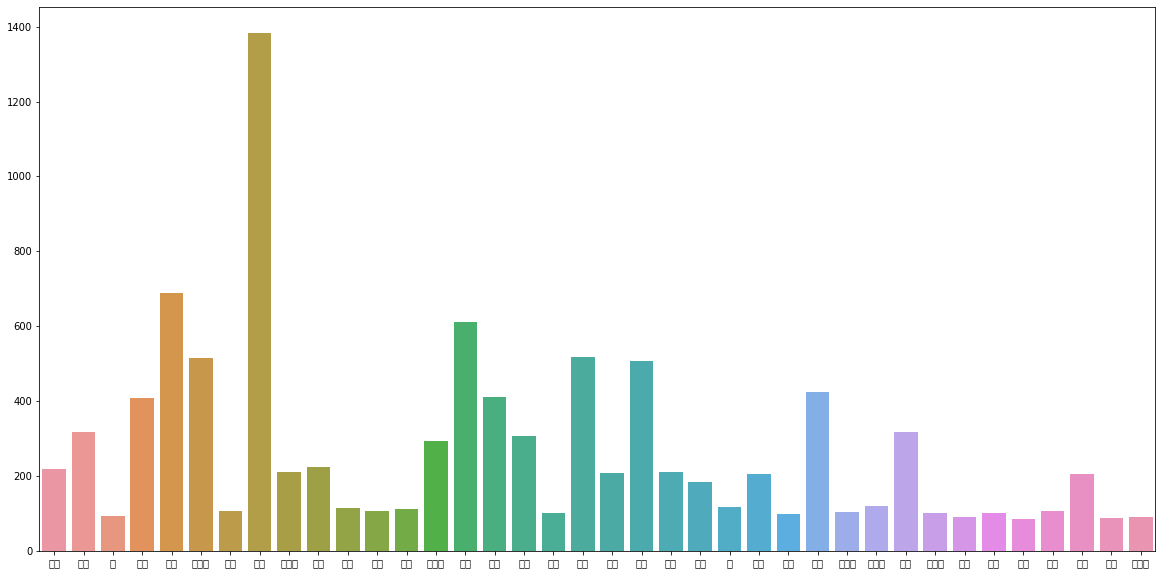

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(x=labels_key_train, y=vals)

# TESTING17032022_FREEZE_LAYERS

## TESTING_FREEZE25LAYERS_FREEZECNN



### **Check result train_image**

In [ ]:
checkpoint_path = os.path.join(basepath, 'training_3_freeze25layer_freezeCNN/')
checkpoint_file = os.listdir(checkpoint_path)

In [ ]:
len(checkpoint_file)

5

In [ ]:
train_real_dataset_path = os.path.join(basepath, 'dataset/Pipeline_train_and_test/train-real-dataset-area/')
image_test_file = os.listdir(train_real_dataset_path)
path_test_image = train_real_dataset_path

In [ ]:
CER_CHECKPOINT_TRAIN = {}
for checkpoint in checkpoint_file:
  path = checkpoint_path + checkpoint
  model = get_Model(training=False)
  model.load_weights(path)
  sum_cer = []
  total = 0
  acc = 0
  letter_total = 0
  letter_acc = 0
  for image in image_test_file:
      # choice = random.randint(0,9999)
      path = path_test_image + image
      
      img_pred = process_image(path)
      net_out_value = model.predict(img_pred)
      pred_texts = decode_label(net_out_value)
      newstr = pred_texts.replace("Z", "")

      # label = image_test_file[i][0: len(image_test_file[i])-4]

      string = ''
      for j in range(3):
          if image[j]>='0' and image[j]<='9':
            continue
          else:
            string += image[j]
      if string.endswith('p'): string = string.rstrip(string[-1])
      if string.endswith('.'): string = string.rstrip(string[-1])
      # print('Predicted: '+newstr +" "+'Label: '+string)
      cer = edit_distance(newstr, string)
      error = cer/max(len(newstr), len(string))
      

      for i in range(min(len(newstr), len(string))):
      #ti = test_img[i][:-9]
          if newstr[i] == string[i]:
              letter_acc += 1
      letter_total += max(len(newstr), len(string))
      if newstr == string:
          acc += 1
      total += 1
      sum_cer.append(error)
  cer_rate = sum(sum_cer) / len(image_test_file)
  CER_CHECKPOINT_TRAIN[str(checkpoint).split('.')[0]]=float(cer_rate)
  print("CER_TRAIN_{}: ".format(str(checkpoint)),cer_rate)
  print("ACC_TRAIN_{}: ".format(str(checkpoint)), acc / total)
  print("letter ACC_TRAIN_{}: ".format(str(checkpoint)), letter_acc / letter_total)

CER_TRAIN_cp-0280.hdf5:  0.015151515151515152
ACC_TRAIN_cp-0280.hdf5:  0.9696969696969697
letter ACC_TRAIN_cp-0280.hdf5:  0.9857142857142858
CER_TRAIN_cp-0240.hdf5:  0.29797979797979796
ACC_TRAIN_cp-0240.hdf5:  0.5252525252525253
letter ACC_TRAIN_cp-0240.hdf5:  0.6523809523809524
CER_TRAIN_cp-0220.hdf5:  0.6683501683501681
ACC_TRAIN_cp-0220.hdf5:  0.1111111111111111
letter ACC_TRAIN_cp-0220.hdf5:  0.2761904761904762
CER_TRAIN_cp-0260.hdf5:  0.06481481481481481
ACC_TRAIN_cp-0260.hdf5:  0.8585858585858586
letter ACC_TRAIN_cp-0260.hdf5:  0.9009433962264151
CER_TRAIN_cp-0300.hdf5:  0.005050505050505051
ACC_TRAIN_cp-0300.hdf5:  0.98989898989899
letter ACC_TRAIN_cp-0300.hdf5:  0.9952380952380953


In [ ]:
CER_CHECKPOINT_TRAIN 

{'cp-0220': 0.6683501683501681,
 'cp-0240': 0.29797979797979796,
 'cp-0260': 0.06481481481481481,
 'cp-0280': 0.015151515151515152,
 'cp-0300': 0.005050505050505051}

### **Check result val_image**

In [ ]:
checkpoint_path = os.path.join(basepath, 'training_3_freeze25layer_freezeCNN/')
checkpoint_file = os.listdir(checkpoint_path)

In [ ]:
len(checkpoint_file)

5

In [ ]:
test_real_dataset_path = os.path.join(basepath, 'dataset/Pipeline_train_and_test/val_real_dataset/')
image_test_file = os.listdir(test_real_dataset_path)
path_test_image = test_real_dataset_path

In [ ]:
CER_CHECKPOINT_VAL = {}
for checkpoint in checkpoint_file:
  path = checkpoint_path + checkpoint
  model = get_Model(training=False)
  model.load_weights(path)
  sum_cer = []
  total = 0
  acc = 0
  letter_total = 0
  letter_acc = 0
  for image in image_test_file:
      # choice = random.randint(0,9999)
      path = path_test_image + image
      
      img_pred = process_image(path)
      net_out_value = model.predict(img_pred)
      pred_texts = decode_label(net_out_value)
      newstr = pred_texts.replace("Z", "")

      # label = image_test_file[i][0: len(image_test_file[i])-4]

      string = ''
      for j in range(3):
          if image[j]>='0' and image[j]<='9':
            continue
          else:
            string += image[j]
      if string.endswith('p'): string = string.rstrip(string[-1])
      if string.endswith('.'): string = string.rstrip(string[-1])
      # print('Predicted: '+newstr +" "+'Label: '+string)
      cer = edit_distance(newstr, string)
      error = cer/max(len(newstr), len(string))
      

      for i in range(min(len(newstr), len(string))):
      #ti = test_img[i][:-9]
          if newstr[i] == string[i]:
              letter_acc += 1
      letter_total += max(len(newstr), len(string))
      if newstr == string:
          acc += 1
      total += 1
      sum_cer.append(error)
  cer_rate = sum(sum_cer) / len(image_test_file)
  CER_CHECKPOINT_VAL[str(checkpoint).split('.')[0]]=float(cer_rate)
  print("CER_VAL_{}: ".format(str(checkpoint)),cer_rate)
  print("ACC_VAL_{}: ".format(str(checkpoint)), acc / total)
  print("letter ACC_VAL{}: ".format(str(checkpoint)), letter_acc / letter_total)

CER_VAL_cp-0280.hdf5:  0.6527777777777778
ACC_VAL_cp-0280.hdf5:  0.16666666666666666
letter ACC_VALcp-0280.hdf5:  0.20689655172413793
CER_VAL_cp-0240.hdf5:  0.75
ACC_VAL_cp-0240.hdf5:  0.16666666666666666
letter ACC_VALcp-0240.hdf5:  0.17857142857142858
CER_VAL_cp-0220.hdf5:  0.8333333333333334
ACC_VAL_cp-0220.hdf5:  0.16666666666666666
letter ACC_VALcp-0220.hdf5:  0.14285714285714285
CER_VAL_cp-0260.hdf5:  0.6666666666666666
ACC_VAL_cp-0260.hdf5:  0.16666666666666666
letter ACC_VALcp-0260.hdf5:  0.25
CER_VAL_cp-0300.hdf5:  0.611111111111111
ACC_VAL_cp-0300.hdf5:  0.16666666666666666
letter ACC_VALcp-0300.hdf5:  0.2413793103448276


In [ ]:
CER_CHECKPOINT_VAL

{'cp-0220': 0.8333333333333334,
 'cp-0240': 0.75,
 'cp-0260': 0.6666666666666666,
 'cp-0280': 0.6527777777777778,
 'cp-0300': 0.611111111111111}

### **Lưu kết quả các checkpoint trên toàn bộ tập dữ liệu train và val**

In [ ]:
import csv
HEADER = ['CP20', 'CP40', 'CP60', 'CP80', 'CP100', 'CP120', 'CP140', 'CP160', 'CP180', 'CP200']
DATA = [
        CER_CHECKPOINT_TRAIN,
        CER_CHECKPOINT_VAL,
]

with open('/content/drive/MyDrive/Recognition CRNN/Recognition part. CRNN KERAS/result.csv', 'w', encoding='UTF8', newline='') as f:
    writer = csv.writer(f)

    writer.writerow(HEADER)

    writer.writerows(DATA)

In [ ]:
import csv

d1 = CER_CHECKPOINT_TRAIN
d2 = CER_CHECKPOINT_VAL

csv_columns = ['cp-0220', 'cp-0240', 'cp-0260', 'cp-0280', 'cp-0300']

with open('/content/drive/MyDrive/RecognitionCRNN/Recognition_CRNN_KERAS/result_freeze25layers_freezeCNN.csv', 'a', encoding='UTF8', newline='') as f:
    wr = csv.DictWriter(f, fieldnames=csv_columns)
    wr.writeheader()
    wr.writerow(d1)
    wr.writerow(d2)

### **CHECK CP260 CHO TỪNG CLASS RIÊNG BIỆT TRONG TẬP DỮ LIỆU TRAIN**

In [ ]:
train_real_classify_path = '/content/drive/MyDrive/RecognitionCRNN/Recognition_CRNN_KERAS/dataset/Pipeline_train_and_test/train_real_dataset_classify/'
train_real_classify_folder = os.listdir(train_real_classify_path)
len(train_real_classify_folder)

38

In [ ]:
keys = []
values = []
for folder in train_real_classify_folder:
  path = train_real_classify_path + folder
  keys.append(folder)
  values.append(len(os.listdir(path)))

In [ ]:
dictionary_train = dict(zip(keys, values))
dictionary_train

{'なにわ': 5,
 '三重': 1,
 '京': 1,
 '京都': 14,
 '八戸': 1,
 '八王子': 1,
 '千葉': 3,
 '名古屋': 2,
 '和歌山': 1,
 '和泉': 2,
 '品川': 5,
 '多摩': 3,
 '大宮': 2,
 '大阪': 7,
 '奈良': 2,
 '姫路': 2,
 '宇都宮': 1,
 '宮城': 1,
 '富山': 1,
 '山梨': 1,
 '岡山': 1,
 '川崎': 1,
 '所沢': 2,
 '春日部': 1,
 '横浜': 4,
 '水戸': 2,
 '沖': 1,
 '沼津': 1,
 '滋賀': 3,
 '熊谷': 1,
 '相模': 5,
 '神戸': 6,
 '練馬': 1,
 '群馬': 4,
 '習志野': 3,
 '足立': 4,
 '長野': 1,
 '静岡': 2}

In [ ]:
keys

['なにわ',
 '三重',
 '京',
 '京都',
 '八戸',
 '八王子',
 '千葉',
 '名古屋',
 '和歌山',
 '和泉',
 '品川',
 '多摩',
 '大宮',
 '大阪',
 '奈良',
 '姫路',
 '宇都宮',
 '宮城',
 '富山',
 '山梨',
 '岡山',
 '川崎',
 '所沢',
 '春日部',
 '横浜',
 '水戸',
 '沖',
 '沼津',
 '滋賀',
 '熊谷',
 '相模',
 '神戸',
 '練馬',
 '群馬',
 '習志野',
 '足立',
 '長野',
 '静岡']

In [ ]:
val_real_classify_path = '/content/drive/MyDrive/RecognitionCRNN/Recognition_CRNN_KERAS/dataset/Pipeline_train_and_test/val_real_dataset_classify/'
val_real_classify_folder = os.listdir(val_real_classify_path)
len(val_real_classify_folder)

10

In [ ]:
keys_val = []
values_val = []
for folder in val_real_classify_folder:
  path = val_real_classify_path + folder
  keys_val.append(folder)
  values_val.append(len(os.listdir(path)))

In [ ]:
dictionary_val = dict(zip(keys_val, values_val))
dictionary_val

{'なにわ': 1,
 '京都': 2,
 '八王子': 1,
 '名古屋': 1,
 '多摩': 1,
 '大阪': 1,
 '春日部': 1,
 '練馬': 2,
 '群馬': 1,
 '足立': 1}

In [ ]:
keys_val

['なにわ', '京都', '八王子', '名古屋', '多摩', '大阪', '春日部', '練馬', '群馬', '足立']

In [ ]:
#/content/drive/MyDrive/Recognition CRNN/Recognition part. CRNN KERAS/training_2/cp-0120.hdf5
model = get_Model(training=False)
model.load_weights('/content/drive/MyDrive/RecognitionCRNN/Recognition_CRNN_KERAS/training_3_freeze25layer_freezeCNN/cp-0260.hdf5')

In [ ]:
#Check class only in test and log value of train
dict_val_for_train = {}
for folder in train_real_classify_folder:
  path = train_real_classify_path + folder
  path_image = os.listdir(path)
  sum_cer = []
  total = 0
  acc = 0
  letter_total = 0
  letter_acc = 0
  # CER_CHECKPOINT_TRAIN_FOR_CLASS = []
  for image in path_image:
    path_img = path +'/'+image

    img_pred = process_image(path_img)
    net_out_value = model.predict(img_pred)
    pred_texts = decode_label(net_out_value)
    newstr = pred_texts.replace("Z", "")

    # label = image_test_file[i][0: len(image_test_file[i])-4]

    string = ''
    for j in range(3):
        if image[j]>='0' and image[j]<='9':
          continue
        else:
          string += image[j]
    if string.endswith('p'): string = string.rstrip(string[-1])
    if string.endswith('.'): string = string.rstrip(string[-1])
    # print('Predicted: '+newstr +" "+'Label: '+string)
    cer = edit_distance(newstr, string)
    error = cer/max(len(newstr), len(string))
    

    for i in range(min(len(newstr), len(string))):
    #ti = test_img[i][:-9]
        if newstr[i] == string[i]:
            letter_acc += 1
    letter_total += max(len(newstr), len(string))
    if newstr == string:
        acc += 1
    total += 1
    sum_cer.append(error)

  cer_rate = sum(sum_cer) / len(path_image)
  if folder in keys_val:
    print("CER_TRAIN_FOR_CLASS_{}: ".format(str(folder)),cer_rate)
    dict_val_for_train[str(folder)]=float(cer_rate)


  # print("ACC_TRAIN_FOR_CLASS_{}: ".format(str(folder)), acc / total)
  # print("letter ACC_FOR_CLASS_{}: ".format(str(folder)), letter_acc / letter_total)

CER_TRAIN_FOR_CLASS_なにわ:  0.0
CER_TRAIN_FOR_CLASS_京都:  0.023809523809523808
CER_TRAIN_FOR_CLASS_八王子:  0.0
CER_TRAIN_FOR_CLASS_名古屋:  0.125
CER_TRAIN_FOR_CLASS_多摩:  0.16666666666666666
CER_TRAIN_FOR_CLASS_大阪:  0.0
CER_TRAIN_FOR_CLASS_春日部:  0.3333333333333333
CER_TRAIN_FOR_CLASS_練馬:  0.0
CER_TRAIN_FOR_CLASS_群馬:  0.0
CER_TRAIN_FOR_CLASS_足立:  0.0


In [ ]:
dict_val_for_train

{'なにわ': 0.0,
 '京都': 0.023809523809523808,
 '八王子': 0.0,
 '名古屋': 0.125,
 '多摩': 0.16666666666666666,
 '大阪': 0.0,
 '春日部': 0.3333333333333333,
 '練馬': 0.0,
 '群馬': 0.0,
 '足立': 0.0}

In [ ]:
## TEST 17032022 - TEST FULL TẬP TRAIN CHO CÁC CLASS Ở CP260
dict_val_for_train = {}
for folder in train_real_classify_folder:
  path = train_real_classify_path + folder
  path_image = os.listdir(path)
  sum_cer = []
  total = 0
  acc = 0
  letter_total = 0
  letter_acc = 0
  # CER_CHECKPOINT_TRAIN_FOR_CLASS = []
  for image in path_image:
    path_img = path +'/'+image

    img_pred = process_image(path_img)
    net_out_value = model.predict(img_pred)
    pred_texts = decode_label(net_out_value)
    newstr = pred_texts.replace("Z", "")

    # label = image_test_file[i][0: len(image_test_file[i])-4]

    string = ''
    for j in range(3):
        if image[j]>='0' and image[j]<='9':
          continue
        else:
          string += image[j]
    if string.endswith('p'): string = string.rstrip(string[-1])
    if string.endswith('.'): string = string.rstrip(string[-1])
    # print('Predicted: '+newstr +" "+'Label: '+string)
    cer = edit_distance(newstr, string)
    error = cer/max(len(newstr), len(string))
    

    for i in range(min(len(newstr), len(string))):
    #ti = test_img[i][:-9]
        if newstr[i] == string[i]:
            letter_acc += 1
    letter_total += max(len(newstr), len(string))
    if newstr == string:
        acc += 1
    total += 1
    sum_cer.append(error)

  cer_rate = sum(sum_cer) / len(path_image)
  # if folder in keys_val:
  print("CER_TRAIN_FOR_CLASS_{}: ".format(str(folder)),cer_rate)
  dict_val_for_train[str(folder)]=float(cer_rate)


  # print("ACC_TRAIN_FOR_CLASS_{}: ".format(str(folder)), acc / total)
  # print("letter ACC_FOR_CLASS_{}: ".format(str(folder)), letter_acc / letter_total)

CER_TRAIN_FOR_CLASS_なにわ:  0.0
CER_TRAIN_FOR_CLASS_三重:  0.0
CER_TRAIN_FOR_CLASS_京:  0.0
CER_TRAIN_FOR_CLASS_京都:  0.023809523809523808
CER_TRAIN_FOR_CLASS_八戸:  0.0
CER_TRAIN_FOR_CLASS_八王子:  0.0
CER_TRAIN_FOR_CLASS_千葉:  0.0
CER_TRAIN_FOR_CLASS_名古屋:  0.125
CER_TRAIN_FOR_CLASS_和歌山:  0.0
CER_TRAIN_FOR_CLASS_和泉:  0.0
CER_TRAIN_FOR_CLASS_品川:  0.1
CER_TRAIN_FOR_CLASS_多摩:  0.16666666666666666
CER_TRAIN_FOR_CLASS_大宮:  0.0
CER_TRAIN_FOR_CLASS_大阪:  0.0
CER_TRAIN_FOR_CLASS_奈良:  0.0
CER_TRAIN_FOR_CLASS_姫路:  0.25
CER_TRAIN_FOR_CLASS_宇都宮:  0.0
CER_TRAIN_FOR_CLASS_宮城:  0.5
CER_TRAIN_FOR_CLASS_富山:  0.0
CER_TRAIN_FOR_CLASS_山梨:  0.5
CER_TRAIN_FOR_CLASS_岡山:  0.0
CER_TRAIN_FOR_CLASS_川崎:  0.0
CER_TRAIN_FOR_CLASS_所沢:  0.25
CER_TRAIN_FOR_CLASS_春日部:  0.3333333333333333
CER_TRAIN_FOR_CLASS_横浜:  0.125
CER_TRAIN_FOR_CLASS_水戸:  0.25
CER_TRAIN_FOR_CLASS_沖:  0.0
CER_TRAIN_FOR_CLASS_沼津:  0.5
CER_TRAIN_FOR_CLASS_滋賀:  0.0
CER_TRAIN_FOR_CLASS_熊谷:  0.5
CER_TRAIN_FOR_CLASS_相模:  0.0
CER_TRAIN_FOR_CLASS_神戸:  0.0
CER_TRAIN_FOR

In [ ]:
dict_val_for_train

{'なにわ': 0.0,
 '三重': 0.0,
 '京': 0.0,
 '京都': 0.023809523809523808,
 '八戸': 0.0,
 '八王子': 0.0,
 '千葉': 0.0,
 '名古屋': 0.125,
 '和歌山': 0.0,
 '和泉': 0.0,
 '品川': 0.1,
 '多摩': 0.16666666666666666,
 '大宮': 0.0,
 '大阪': 0.0,
 '奈良': 0.0,
 '姫路': 0.25,
 '宇都宮': 0.0,
 '宮城': 0.5,
 '富山': 0.0,
 '山梨': 0.5,
 '岡山': 0.0,
 '川崎': 0.0,
 '所沢': 0.25,
 '春日部': 0.3333333333333333,
 '横浜': 0.125,
 '水戸': 0.25,
 '沖': 0.0,
 '沼津': 0.5,
 '滋賀': 0.0,
 '熊谷': 0.5,
 '相模': 0.0,
 '神戸': 0.0,
 '練馬': 0.0,
 '群馬': 0.0,
 '習志野': 0.0,
 '足立': 0.0,
 '長野': 0.0,
 '静岡': 0.25}

### **Chạy kết quả trên từng class riêng biệt trên tập val, cụ thể là CP260**

In [ ]:
#/content/drive/MyDrive/Recognition CRNN/Recognition part. CRNN KERAS/training_2/cp-0120.hdf5
model = get_Model(training=False)
model.load_weights('/content/drive/MyDrive/RecognitionCRNN/Recognition_CRNN_KERAS/training_3_freeze25layer_freezeCNN/cp-0260.hdf5')

In [ ]:
dict_val_for_valid = {}
for folder in val_real_classify_folder:
  path = val_real_classify_path + folder
  path_image = os.listdir(path)
  sum_cer = []
  total = 0
  acc = 0
  letter_total = 0
  letter_acc = 0
  # CER_CHECKPOINT_VAL_FOR_CLASS = []
  for image in path_image:
    path_img = path +'/'+image

    img_pred = process_image(path_img)
    net_out_value = model.predict(img_pred)
    pred_texts = decode_label(net_out_value)
    newstr = pred_texts.replace("Z", "")

    # label = image_test_file[i][0: len(image_test_file[i])-4]

    string = ''
    for j in range(3):
        if image[j]>='0' and image[j]<='9':
          continue
        else:
          string += image[j]
    if string.endswith('p'): string = string.rstrip(string[-1])
    if string.endswith('.'): string = string.rstrip(string[-1])
    # print('Predicted: '+newstr +" "+'Label: '+string)
    cer = edit_distance(newstr, string)
    error = cer/max(len(newstr), len(string))
    

    for i in range(min(len(newstr), len(string))):
    #ti = test_img[i][:-9]
        if newstr[i] == string[i]:
            letter_acc += 1
    letter_total += max(len(newstr), len(string))
    if newstr == string:
        acc += 1
    total += 1
    sum_cer.append(error)

  cer_rate = sum(sum_cer) / len(path_image)
  # CER_CHECKPOINT_VAL_FOR_CLASS.append(cer_rate)
  dict_val_for_valid[str(folder)] = float(cer_rate)
  print("CER_VAL_FOR_CLASS_{}: ".format(str(folder)),cer_rate)
  # print("ACC_VAL_FOR_CLASS_{}: ".format(str(folder)), acc / total)
  # print("letter ACC_FOR_CLASS_{}: ".format(str(folder)), letter_acc / letter_total)

CER_VAL_FOR_CLASS_なにわ:  1.0
CER_VAL_FOR_CLASS_京都:  0.0
CER_VAL_FOR_CLASS_八王子:  1.0
CER_VAL_FOR_CLASS_名古屋:  1.0
CER_VAL_FOR_CLASS_多摩:  0.5
CER_VAL_FOR_CLASS_大阪:  0.5
CER_VAL_FOR_CLASS_春日部:  1.0
CER_VAL_FOR_CLASS_練馬:  0.75
CER_VAL_FOR_CLASS_群馬:  1.0
CER_VAL_FOR_CLASS_足立:  0.5


In [ ]:
dict_val_for_valid

{'なにわ': 1.0,
 '京都': 0.0,
 '八王子': 1.0,
 '名古屋': 1.0,
 '多摩': 0.5,
 '大阪': 0.5,
 '春日部': 1.0,
 '練馬': 0.75,
 '群馬': 1.0,
 '足立': 0.5}

### **Lưu kết quả** 

In [ ]:
import csv

d1 = dict_val_for_train
d2 = dict_val_for_valid

csv_columns = ['なにわ',
 '三重',
 '京',
 '京都',
 '八戸',
 '八王子',
 '千葉',
 '名古屋',
 '和歌山',
 '和泉',
 '品川',
 '多摩',
 '大宮',
 '大阪',
 '奈良',
 '姫路',
 '宇都宮',
 '宮城',
 '富山',
 '山梨',
 '岡山',
 '川崎',
 '所沢',
 '春日部',
 '横浜',
 '水戸',
 '沖',
 '沼津',
 '滋賀',
 '熊谷',
 '相模',
 '神戸',
 '練馬',
 '群馬',
 '習志野',
 '足立',
 '長野',
 '静岡']

with open('/content/drive/MyDrive/RecognitionCRNN/Recognition_CRNN_KERAS/result_freeze25layers_freezeCNN_specify_for_class.csv', 'a', encoding='UTF8', newline='') as f:
    wr = csv.DictWriter(f, fieldnames=csv_columns)
    wr.writeheader()
    wr.writerow(d1)
    wr.writerow(d2)

In [ ]:
import csv
d1 = dictionary_train 
d2 = dictionary_val
csv_columns = ['なにわ',
 '三重',
 '京',
 '京都',
 '八戸',
 '八王子',
 '千葉',
 '名古屋',
 '和歌山',
 '和泉',
 '品川',
 '多摩',
 '大宮',
 '大阪',
 '奈良',
 '姫路',
 '宇都宮',
 '宮城',
 '富山',
 '山梨',
 '岡山',
 '川崎',
 '所沢',
 '春日部',
 '横浜',
 '水戸',
 '沖',
 '沼津',
 '滋賀',
 '熊谷',
 '相模',
 '神戸',
 '練馬',
 '群馬',
 '習志野',
 '足立',
 '長野',
 '静岡']

with open('/content/drive/MyDrive/RecognitionCRNN/Recognition_CRNN_KERAS/samples_in_every_class.csv', 'a', encoding='UTF8', newline='') as f:
    wr = csv.DictWriter(f, fieldnames=csv_columns)
    wr.writeheader()
    wr.writerow(d1)
    wr.writerow(d2)

## TESTING_FREEZE31LAYERS_FREEZE_ONEPART_OF_RNN



### **Check result train_image**

In [ ]:
checkpoint_path = os.path.join(basepath, 'training_4_freeze31layer_one_part_of_RNN/')
checkpoint_file = os.listdir(checkpoint_path)

In [ ]:
len(checkpoint_file)

5

In [ ]:
train_real_dataset_path = os.path.join(basepath, 'dataset/Pipeline_train_and_test/train-real-dataset-area/')
image_test_file = os.listdir(train_real_dataset_path)
path_test_image = train_real_dataset_path

In [ ]:
CER_CHECKPOINT_TRAIN = {}
for checkpoint in checkpoint_file:
  path = checkpoint_path + checkpoint
  model = get_Model(training=False)
  model.load_weights(path)
  sum_cer = []
  total = 0
  acc = 0
  letter_total = 0
  letter_acc = 0
  for image in image_test_file:
      # choice = random.randint(0,9999)
      path = path_test_image + image
      
      img_pred = process_image(path)
      net_out_value = model.predict(img_pred)
      pred_texts = decode_label(net_out_value)
      newstr = pred_texts.replace("Z", "")

      # label = image_test_file[i][0: len(image_test_file[i])-4]

      string = ''
      for j in range(3):
          if image[j]>='0' and image[j]<='9':
            continue
          else:
            string += image[j]
      if string.endswith('p'): string = string.rstrip(string[-1])
      if string.endswith('.'): string = string.rstrip(string[-1])
      # print('Predicted: '+newstr +" "+'Label: '+string)
      cer = edit_distance(newstr, string)
      error = cer/max(len(newstr), len(string))
      

      for i in range(min(len(newstr), len(string))):
      #ti = test_img[i][:-9]
          if newstr[i] == string[i]:
              letter_acc += 1
      letter_total += max(len(newstr), len(string))
      if newstr == string:
          acc += 1
      total += 1
      sum_cer.append(error)
  cer_rate = sum(sum_cer) / len(image_test_file)
  CER_CHECKPOINT_TRAIN[str(checkpoint).split('.')[0]]=float(cer_rate)
  print("CER_TRAIN_{}: ".format(str(checkpoint)),cer_rate)
  print("ACC_TRAIN_{}: ".format(str(checkpoint)), acc / total)
  print("letter ACC_TRAIN_{}: ".format(str(checkpoint)), letter_acc / letter_total)

CER_TRAIN_cp-0220.hdf5:  0.5286195286195287
ACC_TRAIN_cp-0220.hdf5:  0.2222222222222222
letter ACC_TRAIN_cp-0220.hdf5:  0.3744075829383886
CER_TRAIN_cp-0280.hdf5:  0.010101010101010102
ACC_TRAIN_cp-0280.hdf5:  0.98989898989899
letter ACC_TRAIN_cp-0280.hdf5:  0.9904761904761905
CER_TRAIN_cp-0240.hdf5:  0.10101010101010101
ACC_TRAIN_cp-0240.hdf5:  0.797979797979798
letter ACC_TRAIN_cp-0240.hdf5:  0.8428571428571429
CER_TRAIN_cp-0300.hdf5:  0.003367003367003367
ACC_TRAIN_cp-0300.hdf5:  0.98989898989899
letter ACC_TRAIN_cp-0300.hdf5:  0.995260663507109
CER_TRAIN_cp-0260.hdf5:  0.018518518518518517
ACC_TRAIN_cp-0260.hdf5:  0.9595959595959596
letter ACC_TRAIN_cp-0260.hdf5:  0.9715639810426541


In [ ]:
CER_CHECKPOINT_TRAIN

{'cp-0220': 0.5286195286195287,
 'cp-0240': 0.10101010101010101,
 'cp-0260': 0.018518518518518517,
 'cp-0280': 0.010101010101010102,
 'cp-0300': 0.003367003367003367}

### **Check result val_image**

In [ ]:
checkpoint_path = os.path.join(basepath, 'training_4_freeze31layer_one_part_of_RNN/')
checkpoint_file = os.listdir(checkpoint_path)

In [ ]:
len(checkpoint_file)

5

In [ ]:
test_real_dataset_path = os.path.join(basepath, 'dataset/Pipeline_train_and_test/val_real_dataset/')
image_test_file = os.listdir(test_real_dataset_path)
path_test_image = test_real_dataset_path

In [ ]:
CER_CHECKPOINT_VAL = {}
for checkpoint in checkpoint_file:
  path = checkpoint_path + checkpoint
  model = get_Model(training=False)
  model.load_weights(path)
  sum_cer = []
  total = 0
  acc = 0
  letter_total = 0
  letter_acc = 0
  for image in image_test_file:
      # choice = random.randint(0,9999)
      path = path_test_image + image
      
      img_pred = process_image(path)
      net_out_value = model.predict(img_pred)
      pred_texts = decode_label(net_out_value)
      newstr = pred_texts.replace("Z", "")

      # label = image_test_file[i][0: len(image_test_file[i])-4]

      string = ''
      for j in range(3):
          if image[j]>='0' and image[j]<='9':
            continue
          else:
            string += image[j]
      if string.endswith('p'): string = string.rstrip(string[-1])
      if string.endswith('.'): string = string.rstrip(string[-1])
      # print('Predicted: '+newstr +" "+'Label: '+string)
      cer = edit_distance(newstr, string)
      error = cer/max(len(newstr), len(string))
      

      for i in range(min(len(newstr), len(string))):
      #ti = test_img[i][:-9]
          if newstr[i] == string[i]:
              letter_acc += 1
      letter_total += max(len(newstr), len(string))
      if newstr == string:
          acc += 1
      total += 1
      sum_cer.append(error)
  cer_rate = sum(sum_cer) / len(image_test_file)
  CER_CHECKPOINT_VAL[str(checkpoint).split('.')[0]]=float(cer_rate)
  print("CER_VAL_{}: ".format(str(checkpoint)),cer_rate)
  print("ACC_VAL_{}: ".format(str(checkpoint)), acc / total)
  print("letter ACC_VAL{}: ".format(str(checkpoint)), letter_acc / letter_total)

CER_VAL_cp-0220.hdf5:  0.7916666666666666
ACC_VAL_cp-0220.hdf5:  0.16666666666666666
letter ACC_VALcp-0220.hdf5:  0.14285714285714285
CER_VAL_cp-0280.hdf5:  0.6111111111111112
ACC_VAL_cp-0280.hdf5:  0.16666666666666666
letter ACC_VALcp-0280.hdf5:  0.32142857142857145
CER_VAL_cp-0240.hdf5:  0.7083333333333334
ACC_VAL_cp-0240.hdf5:  0.16666666666666666
letter ACC_VALcp-0240.hdf5:  0.21428571428571427
CER_VAL_cp-0300.hdf5:  0.5694444444444444
ACC_VAL_cp-0300.hdf5:  0.25
letter ACC_VALcp-0300.hdf5:  0.35714285714285715
CER_VAL_cp-0260.hdf5:  0.6111111111111112
ACC_VAL_cp-0260.hdf5:  0.16666666666666666
letter ACC_VALcp-0260.hdf5:  0.2857142857142857


In [ ]:
CER_CHECKPOINT_VAL

{'cp-0220': 0.7916666666666666,
 'cp-0240': 0.7083333333333334,
 'cp-0260': 0.6111111111111112,
 'cp-0280': 0.6111111111111112,
 'cp-0300': 0.5694444444444444}

### **Lưu kết quả các checkpoint trên toàn bộ tập dữ liệu train và val**

In [ ]:
import csv

d1 = CER_CHECKPOINT_TRAIN
d2 = CER_CHECKPOINT_VAL

csv_columns = ['cp-0220', 'cp-0240', 'cp-0260', 'cp-0280', 'cp-0300']

with open('/content/drive/MyDrive/RecognitionCRNN/Recognition_CRNN_KERAS/result_freeze31layers_freeze_one_part_of_RNN.csv', 'a', encoding='UTF8', newline='') as f:
    wr = csv.DictWriter(f, fieldnames=csv_columns)
    wr.writeheader()
    wr.writerow(d1)
    wr.writerow(d2)

### **CHECK CP100 CHO TỪNG CLASS RIÊNG BIỆT TRONG TẬP DỮ LIỆU TRAIN VÀ VAL**

In [ ]:
train_real_classify_path = '/content/drive/MyDrive/RecognitionCRNN/Recognition_CRNN_KERAS/dataset/Pipeline_train_and_test/train_real_dataset_classify/'
train_real_classify_folder = os.listdir(train_real_classify_path)
len(train_real_classify_folder)

38

In [ ]:
keys = []
values = []
for folder in train_real_classify_folder:
  path = train_real_classify_path + folder
  keys.append(folder)
  values.append(len(os.listdir(path)))

In [ ]:
dictionary = dict(zip(keys, values))
dictionary

{'なにわ': 5,
 '三重': 1,
 '京': 1,
 '京都': 14,
 '八戸': 1,
 '八王子': 1,
 '千葉': 3,
 '名古屋': 2,
 '和歌山': 1,
 '和泉': 2,
 '品川': 5,
 '多摩': 3,
 '大宮': 2,
 '大阪': 7,
 '奈良': 2,
 '姫路': 2,
 '宇都宮': 1,
 '宮城': 1,
 '富山': 1,
 '山梨': 1,
 '岡山': 1,
 '川崎': 1,
 '所沢': 2,
 '春日部': 1,
 '横浜': 4,
 '水戸': 2,
 '沖': 1,
 '沼津': 1,
 '滋賀': 3,
 '熊谷': 1,
 '相模': 5,
 '神戸': 6,
 '練馬': 1,
 '群馬': 4,
 '習志野': 3,
 '足立': 4,
 '長野': 1,
 '静岡': 2}

In [ ]:
keys

['なにわ',
 '三重',
 '京',
 '京都',
 '八戸',
 '八王子',
 '千葉',
 '名古屋',
 '和歌山',
 '和泉',
 '品川',
 '多摩',
 '大宮',
 '大阪',
 '奈良',
 '姫路',
 '宇都宮',
 '宮城',
 '富山',
 '山梨',
 '岡山',
 '川崎',
 '所沢',
 '春日部',
 '横浜',
 '水戸',
 '沖',
 '沼津',
 '滋賀',
 '熊谷',
 '相模',
 '神戸',
 '練馬',
 '群馬',
 '習志野',
 '足立',
 '長野',
 '静岡']

In [ ]:
val_real_classify_path = '/content/drive/MyDrive/RecognitionCRNN/Recognition_CRNN_KERAS/dataset/Pipeline_train_and_test/val_real_dataset_classify/'
val_real_classify_folder = os.listdir(val_real_classify_path)
len(val_real_classify_folder)

10

In [ ]:
keys_val = []
values_val = []
for folder in val_real_classify_folder:
  path = val_real_classify_path + folder
  keys_val.append(folder)
  values_val.append(len(os.listdir(path)))

In [ ]:
dictionary = dict(zip(keys_val, values_val))
dictionary

{'なにわ': 1,
 '京都': 2,
 '八王子': 1,
 '名古屋': 1,
 '多摩': 1,
 '大阪': 1,
 '春日部': 1,
 '練馬': 2,
 '群馬': 1,
 '足立': 1}

In [ ]:
keys_val

['なにわ', '京都', '八王子', '名古屋', '多摩', '大阪', '春日部', '練馬', '群馬', '足立']

In [ ]:
#/content/drive/MyDrive/Recognition CRNN/Recognition part. CRNN KERAS/training_2/cp-0120.hdf5
model = get_Model(training=False)
model.load_weights('/content/drive/MyDrive/RecognitionCRNN/Recognition_CRNN_KERAS/training_2/cp-0120.hdf5')

In [ ]:
dict_val_for_train = {}
for folder in train_real_classify_folder:
  path = train_real_classify_path + folder
  path_image = os.listdir(path)
  sum_cer = []
  total = 0
  acc = 0
  letter_total = 0
  letter_acc = 0
  # CER_CHECKPOINT_TRAIN_FOR_CLASS = []
  for image in path_image:
    path_img = path +'/'+image

    img_pred = process_image(path_img)
    net_out_value = model.predict(img_pred)
    pred_texts = decode_label(net_out_value)
    newstr = pred_texts.replace("Z", "")

    # label = image_test_file[i][0: len(image_test_file[i])-4]

    string = ''
    for j in range(3):
        if image[j]>='0' and image[j]<='9':
          continue
        else:
          string += image[j]
    if string.endswith('p'): string = string.rstrip(string[-1])
    if string.endswith('.'): string = string.rstrip(string[-1])
    # print('Predicted: '+newstr +" "+'Label: '+string)
    cer = edit_distance(newstr, string)
    error = cer/max(len(newstr), len(string))
    

    for i in range(min(len(newstr), len(string))):
    #ti = test_img[i][:-9]
        if newstr[i] == string[i]:
            letter_acc += 1
    letter_total += max(len(newstr), len(string))
    if newstr == string:
        acc += 1
    total += 1
    sum_cer.append(error)

  cer_rate = sum(sum_cer) / len(path_image)
  if folder in keys_val:
    print("CER_TRAIN_FOR_CLASS_{}: ".format(str(folder)),cer_rate)
    dict_val_for_train[str(folder)]=float(cer_rate)


  # print("ACC_TRAIN_FOR_CLASS_{}: ".format(str(folder)), acc / total)
  # print("letter ACC_FOR_CLASS_{}: ".format(str(folder)), letter_acc / letter_total)

CER_TRAIN_FOR_CLASS_なにわ:  0.0
CER_TRAIN_FOR_CLASS_京都:  0.047619047619047616
CER_TRAIN_FOR_CLASS_八王子:  0.3333333333333333
CER_TRAIN_FOR_CLASS_名古屋:  0.16666666666666666
CER_TRAIN_FOR_CLASS_大阪:  0.0
CER_TRAIN_FOR_CLASS_多摩:  0.0
CER_TRAIN_FOR_CLASS_春日部:  0.0
CER_TRAIN_FOR_CLASS_練馬:  0.0
CER_TRAIN_FOR_CLASS_群馬:  0.125
CER_TRAIN_FOR_CLASS_足立:  0.0


In [ ]:
dict_val_for_train

{'なにわ': 0.0,
 '京都': 0.047619047619047616,
 '八王子': 0.3333333333333333,
 '名古屋': 0.16666666666666666,
 '多摩': 0.0,
 '大阪': 0.0,
 '春日部': 0.0,
 '練馬': 0.0,
 '群馬': 0.125,
 '足立': 0.0}

In [ ]:
## TEST 16032022 - TEST FULL TẬP TRAIN CHO CÁC CLASS Ở CP120
dict_val_for_train = {}
for folder in train_real_classify_folder:
  path = train_real_classify_path + folder
  path_image = os.listdir(path)
  sum_cer = []
  total = 0
  acc = 0
  letter_total = 0
  letter_acc = 0
  # CER_CHECKPOINT_TRAIN_FOR_CLASS = []
  for image in path_image:
    path_img = path +'/'+image

    img_pred = process_image(path_img)
    net_out_value = model.predict(img_pred)
    pred_texts = decode_label(net_out_value)
    newstr = pred_texts.replace("Z", "")

    # label = image_test_file[i][0: len(image_test_file[i])-4]

    string = ''
    for j in range(3):
        if image[j]>='0' and image[j]<='9':
          continue
        else:
          string += image[j]
    if string.endswith('p'): string = string.rstrip(string[-1])
    if string.endswith('.'): string = string.rstrip(string[-1])
    # print('Predicted: '+newstr +" "+'Label: '+string)
    cer = edit_distance(newstr, string)
    error = cer/max(len(newstr), len(string))
    

    for i in range(min(len(newstr), len(string))):
    #ti = test_img[i][:-9]
        if newstr[i] == string[i]:
            letter_acc += 1
    letter_total += max(len(newstr), len(string))
    if newstr == string:
        acc += 1
    total += 1
    sum_cer.append(error)

  cer_rate = sum(sum_cer) / len(path_image)
  # if folder in keys_val:
  print("CER_TRAIN_FOR_CLASS_{}: ".format(str(folder)),cer_rate)
  dict_val_for_train[str(folder)]=float(cer_rate)


  # print("ACC_TRAIN_FOR_CLASS_{}: ".format(str(folder)), acc / total)
  # print("letter ACC_FOR_CLASS_{}: ".format(str(folder)), letter_acc / letter_total)

CER_TRAIN_FOR_CLASS_なにわ:  0.0
CER_TRAIN_FOR_CLASS_三重:  0.0
CER_TRAIN_FOR_CLASS_京:  0.0
CER_TRAIN_FOR_CLASS_京都:  0.047619047619047616
CER_TRAIN_FOR_CLASS_八戸:  0.0
CER_TRAIN_FOR_CLASS_八王子:  0.3333333333333333
CER_TRAIN_FOR_CLASS_千葉:  0.0
CER_TRAIN_FOR_CLASS_名古屋:  0.16666666666666666
CER_TRAIN_FOR_CLASS_和歌山:  0.0
CER_TRAIN_FOR_CLASS_和泉:  0.25
CER_TRAIN_FOR_CLASS_品川:  0.0
CER_TRAIN_FOR_CLASS_多摩:  0.0
CER_TRAIN_FOR_CLASS_大宮:  0.0
CER_TRAIN_FOR_CLASS_大阪:  0.0
CER_TRAIN_FOR_CLASS_奈良:  0.0
CER_TRAIN_FOR_CLASS_姫路:  0.0
CER_TRAIN_FOR_CLASS_宇都宮:  0.0
CER_TRAIN_FOR_CLASS_宮城:  0.0
CER_TRAIN_FOR_CLASS_富山:  0.0
CER_TRAIN_FOR_CLASS_山梨:  0.0
CER_TRAIN_FOR_CLASS_岡山:  0.0
CER_TRAIN_FOR_CLASS_川崎:  0.0
CER_TRAIN_FOR_CLASS_所沢:  0.5
CER_TRAIN_FOR_CLASS_春日部:  0.0
CER_TRAIN_FOR_CLASS_横浜:  0.0
CER_TRAIN_FOR_CLASS_水戸:  0.0
CER_TRAIN_FOR_CLASS_沖:  0.0
CER_TRAIN_FOR_CLASS_沼津:  0.0
CER_TRAIN_FOR_CLASS_滋賀:  0.16666666666666666
CER_TRAIN_FOR_CLASS_熊谷:  1.0
CER_TRAIN_FOR_CLASS_相模:  0.0
CER_TRAIN_FOR_CLASS_神戸:  0.0
CER

In [ ]:
dict_val_for_train

{'なにわ': 0.0,
 '三重': 0.0,
 '京': 0.0,
 '京都': 0.047619047619047616,
 '八戸': 0.0,
 '八王子': 0.3333333333333333,
 '千葉': 0.0,
 '名古屋': 0.16666666666666666,
 '和歌山': 0.0,
 '和泉': 0.25,
 '品川': 0.0,
 '多摩': 0.0,
 '大宮': 0.0,
 '大阪': 0.0,
 '奈良': 0.0,
 '姫路': 0.0,
 '宇都宮': 0.0,
 '宮城': 0.0,
 '富山': 0.0,
 '山梨': 0.0,
 '岡山': 0.0,
 '川崎': 0.0,
 '所沢': 0.5,
 '春日部': 0.0,
 '横浜': 0.0,
 '水戸': 0.0,
 '沖': 0.0,
 '沼津': 0.0,
 '滋賀': 0.16666666666666666,
 '熊谷': 1.0,
 '相模': 0.0,
 '神戸': 0.0,
 '練馬': 0.0,
 '群馬': 0.125,
 '習志野': 0.0,
 '足立': 0.0,
 '長野': 0.0,
 '静岡': 0.5}

### **Chạy kết quả trên từng class riêng biệt trên tập val, cụ thể là CP100**

In [ ]:
#/content/drive/MyDrive/Recognition CRNN/Recognition part. CRNN KERAS/training_2/cp-0120.hdf5
model = get_Model(training=False)
model.load_weights('/content/drive/MyDrive/Recognition CRNN/Recognition part. CRNN KERAS/training_2/cp-0120.hdf5')

In [ ]:
dict_val_for_valid = {}
for folder in val_real_classify_folder:
  path = val_real_classify_path + folder
  path_image = os.listdir(path)
  sum_cer = []
  total = 0
  acc = 0
  letter_total = 0
  letter_acc = 0
  # CER_CHECKPOINT_VAL_FOR_CLASS = []
  for image in path_image:
    path_img = path +'/'+image

    img_pred = process_image(path_img)
    net_out_value = model.predict(img_pred)
    pred_texts = decode_label(net_out_value)
    newstr = pred_texts.replace("Z", "")

    # label = image_test_file[i][0: len(image_test_file[i])-4]

    string = ''
    for j in range(3):
        if image[j]>='0' and image[j]<='9':
          continue
        else:
          string += image[j]
    if string.endswith('p'): string = string.rstrip(string[-1])
    if string.endswith('.'): string = string.rstrip(string[-1])
    # print('Predicted: '+newstr +" "+'Label: '+string)
    cer = edit_distance(newstr, string)
    error = cer/max(len(newstr), len(string))
    

    for i in range(min(len(newstr), len(string))):
    #ti = test_img[i][:-9]
        if newstr[i] == string[i]:
            letter_acc += 1
    letter_total += max(len(newstr), len(string))
    if newstr == string:
        acc += 1
    total += 1
    sum_cer.append(error)

  cer_rate = sum(sum_cer) / len(path_image)
  # CER_CHECKPOINT_VAL_FOR_CLASS.append(cer_rate)
  dict_val_for_valid[str(folder)] = float(cer_rate)
  print("CER_VAL_FOR_CLASS_{}: ".format(str(folder)),cer_rate)
  # print("ACC_VAL_FOR_CLASS_{}: ".format(str(folder)), acc / total)
  # print("letter ACC_FOR_CLASS_{}: ".format(str(folder)), letter_acc / letter_total)

CER_VAL_FOR_CLASS_名古屋:  1.0
CER_VAL_FOR_CLASS_なにわ:  1.0
CER_VAL_FOR_CLASS_京都:  0.25
CER_VAL_FOR_CLASS_八王子:  1.0
CER_VAL_FOR_CLASS_大阪:  0.5
CER_VAL_FOR_CLASS_多摩:  1.0
CER_VAL_FOR_CLASS_群馬:  1.0
CER_VAL_FOR_CLASS_春日部:  0.3333333333333333
CER_VAL_FOR_CLASS_練馬:  0.75
CER_VAL_FOR_CLASS_足立:  0.5


In [ ]:
dict_val_for_valid

{'なにわ': 1.0,
 '京都': 0.25,
 '八王子': 1.0,
 '名古屋': 1.0,
 '多摩': 1.0,
 '大阪': 0.5,
 '春日部': 0.3333333333333333,
 '練馬': 0.75,
 '群馬': 1.0,
 '足立': 0.5}

## TESTING_FREEZE35LAYERS_FREEZECRNN



### **Check result train_image**

In [ ]:
checkpoint_path = os.path.join(basepath, 'training_5_freeze35layer_fullfreezeuntildense/')
checkpoint_file = os.listdir(checkpoint_path)

In [ ]:
len(checkpoint_file)

5

In [ ]:
train_real_dataset_path = os.path.join(basepath, 'dataset/Pipeline_train_and_test/train-real-dataset-area/')
image_test_file = os.listdir(train_real_dataset_path)
path_test_image = train_real_dataset_path

In [ ]:
CER_CHECKPOINT_TRAIN = {}
for checkpoint in checkpoint_file:
  path = checkpoint_path + checkpoint
  model = get_Model(training=False)
  model.load_weights(path)
  sum_cer = []
  total = 0
  acc = 0
  letter_total = 0
  letter_acc = 0
  for image in image_test_file:
      # choice = random.randint(0,9999)
      path = path_test_image + image
      
      img_pred = process_image(path)
      net_out_value = model.predict(img_pred)
      pred_texts = decode_label(net_out_value)
      newstr = pred_texts.replace("Z", "")

      # label = image_test_file[i][0: len(image_test_file[i])-4]

      string = ''
      for j in range(3):
          if image[j]>='0' and image[j]<='9':
            continue
          else:
            string += image[j]
      if string.endswith('p'): string = string.rstrip(string[-1])
      if string.endswith('.'): string = string.rstrip(string[-1])
      # print('Predicted: '+newstr +" "+'Label: '+string)
      cer = edit_distance(newstr, string)
      error = cer/max(len(newstr), len(string))
      

      for i in range(min(len(newstr), len(string))):
      #ti = test_img[i][:-9]
          if newstr[i] == string[i]:
              letter_acc += 1
      letter_total += max(len(newstr), len(string))
      if newstr == string:
          acc += 1
      total += 1
      sum_cer.append(error)
  cer_rate = sum(sum_cer) / len(image_test_file)
  CER_CHECKPOINT_TRAIN[str(checkpoint).split('.')[0]]=float(cer_rate)
  print("CER_TRAIN_{}: ".format(str(checkpoint)),cer_rate)
  print("ACC_TRAIN_{}: ".format(str(checkpoint)), acc / total)
  print("letter ACC_TRAIN_{}: ".format(str(checkpoint)), letter_acc / letter_total)

CER_TRAIN_cp-0240.hdf5:  0.11363636363636363
ACC_TRAIN_cp-0240.hdf5:  0.8080808080808081
letter ACC_TRAIN_cp-0240.hdf5:  0.8720379146919431
CER_TRAIN_cp-0260.hdf5:  0.010101010101010102
ACC_TRAIN_cp-0260.hdf5:  0.9797979797979798
letter ACC_TRAIN_cp-0260.hdf5:  0.9809523809523809
CER_TRAIN_cp-0220.hdf5:  0.4983164983164985
ACC_TRAIN_cp-0220.hdf5:  0.2828282828282828
letter ACC_TRAIN_cp-0220.hdf5:  0.46919431279620855
CER_TRAIN_cp-0280.hdf5:  0.015151515151515152
ACC_TRAIN_cp-0280.hdf5:  0.9696969696969697
letter ACC_TRAIN_cp-0280.hdf5:  0.9714285714285714
CER_TRAIN_cp-0300.hdf5:  0.0
ACC_TRAIN_cp-0300.hdf5:  1.0
letter ACC_TRAIN_cp-0300.hdf5:  1.0


In [ ]:
CER_CHECKPOINT_TRAIN

{'cp-0220': 0.4983164983164985,
 'cp-0240': 0.11363636363636363,
 'cp-0260': 0.010101010101010102,
 'cp-0280': 0.015151515151515152,
 'cp-0300': 0.0}

### **Check result val_image**

In [ ]:
checkpoint_path = os.path.join(basepath, 'training_5_freeze35layer_fullfreezeuntildense/')
checkpoint_file = os.listdir(checkpoint_path)

In [ ]:
len(checkpoint_file)

5

In [ ]:
test_real_dataset_path = os.path.join(basepath, 'dataset/Pipeline_train_and_test/val_real_dataset/')
image_test_file = os.listdir(test_real_dataset_path)
path_test_image = test_real_dataset_path

In [ ]:
CER_CHECKPOINT_VAL = {}
for checkpoint in checkpoint_file:
  path = checkpoint_path + checkpoint
  model = get_Model(training=False)
  model.load_weights(path)
  sum_cer = []
  total = 0
  acc = 0
  letter_total = 0
  letter_acc = 0
  for image in image_test_file:
      # choice = random.randint(0,9999)
      path = path_test_image + image
      
      img_pred = process_image(path)
      net_out_value = model.predict(img_pred)
      pred_texts = decode_label(net_out_value)
      newstr = pred_texts.replace("Z", "")

      # label = image_test_file[i][0: len(image_test_file[i])-4]

      string = ''
      for j in range(3):
          if image[j]>='0' and image[j]<='9':
            continue
          else:
            string += image[j]
      if string.endswith('p'): string = string.rstrip(string[-1])
      if string.endswith('.'): string = string.rstrip(string[-1])
      # print('Predicted: '+newstr +" "+'Label: '+string)
      cer = edit_distance(newstr, string)
      error = cer/max(len(newstr), len(string))
      

      for i in range(min(len(newstr), len(string))):
      #ti = test_img[i][:-9]
          if newstr[i] == string[i]:
              letter_acc += 1
      letter_total += max(len(newstr), len(string))
      if newstr == string:
          acc += 1
      total += 1
      sum_cer.append(error)
  cer_rate = sum(sum_cer) / len(image_test_file)
  CER_CHECKPOINT_VAL[str(checkpoint).split('.')[0]]=float(cer_rate)
  print("CER_VAL_{}: ".format(str(checkpoint)),cer_rate)
  print("ACC_VAL_{}: ".format(str(checkpoint)), acc / total)
  print("letter ACC_VAL{}: ".format(str(checkpoint)), letter_acc / letter_total)

CER_VAL_cp-0240.hdf5:  0.6180555555555556
ACC_VAL_cp-0240.hdf5:  0.16666666666666666
letter ACC_VALcp-0240.hdf5:  0.3333333333333333
CER_VAL_cp-0260.hdf5:  0.4930555555555555
ACC_VAL_cp-0260.hdf5:  0.3333333333333333
letter ACC_VALcp-0260.hdf5:  0.41935483870967744
CER_VAL_cp-0220.hdf5:  0.8472222222222222
ACC_VAL_cp-0220.hdf5:  0.0
letter ACC_VALcp-0220.hdf5:  0.07142857142857142
CER_VAL_cp-0280.hdf5:  0.47222222222222215
ACC_VAL_cp-0280.hdf5:  0.3333333333333333
letter ACC_VALcp-0280.hdf5:  0.45161290322580644
CER_VAL_cp-0300.hdf5:  0.47222222222222215
ACC_VAL_cp-0300.hdf5:  0.3333333333333333
letter ACC_VALcp-0300.hdf5:  0.4482758620689655


In [ ]:
CER_CHECKPOINT_VAL

{'cp-0220': 0.8472222222222222,
 'cp-0240': 0.6180555555555556,
 'cp-0260': 0.4930555555555555,
 'cp-0280': 0.47222222222222215,
 'cp-0300': 0.47222222222222215}

### **Lưu kết quả các checkpoint trên toàn bộ tập dữ liệu train và val**

In [ ]:
import csv

d1 = CER_CHECKPOINT_TRAIN
d2 = CER_CHECKPOINT_VAL

csv_columns = ['cp-0220', 'cp-0240', 'cp-0260', 'cp-0280', 'cp-0300']

with open('/content/drive/MyDrive/RecognitionCRNN/Recognition_CRNN_KERAS/result_freeze35layers_freezeCRNN.csv', 'a', encoding='UTF8', newline='') as f:
    wr = csv.DictWriter(f, fieldnames=csv_columns)
    wr.writeheader()
    wr.writerow(d1)
    wr.writerow(d2)

### **CHECK CP100 CHO TỪNG CLASS RIÊNG BIỆT TRONG TẬP DỮ LIỆU TRAIN VÀ VAL**

In [ ]:
train_real_classify_path = '/content/drive/MyDrive/RecognitionCRNN/Recognition_CRNN_KERAS/dataset/Pipeline_train_and_test/train_real_dataset_classify/'
train_real_classify_folder = os.listdir(train_real_classify_path)
len(train_real_classify_folder)

38

In [ ]:
keys = []
values = []
for folder in train_real_classify_folder:
  path = train_real_classify_path + folder
  keys.append(folder)
  values.append(len(os.listdir(path)))

In [ ]:
dictionary = dict(zip(keys, values))
dictionary

{'なにわ': 5,
 '三重': 1,
 '京': 1,
 '京都': 14,
 '八戸': 1,
 '八王子': 1,
 '千葉': 3,
 '名古屋': 2,
 '和歌山': 1,
 '和泉': 2,
 '品川': 5,
 '多摩': 3,
 '大宮': 2,
 '大阪': 7,
 '奈良': 2,
 '姫路': 2,
 '宇都宮': 1,
 '宮城': 1,
 '富山': 1,
 '山梨': 1,
 '岡山': 1,
 '川崎': 1,
 '所沢': 2,
 '春日部': 1,
 '横浜': 4,
 '水戸': 2,
 '沖': 1,
 '沼津': 1,
 '滋賀': 3,
 '熊谷': 1,
 '相模': 5,
 '神戸': 6,
 '練馬': 1,
 '群馬': 4,
 '習志野': 3,
 '足立': 4,
 '長野': 1,
 '静岡': 2}

In [ ]:
keys

['なにわ',
 '三重',
 '京',
 '京都',
 '八戸',
 '八王子',
 '千葉',
 '名古屋',
 '和歌山',
 '和泉',
 '品川',
 '多摩',
 '大宮',
 '大阪',
 '奈良',
 '姫路',
 '宇都宮',
 '宮城',
 '富山',
 '山梨',
 '岡山',
 '川崎',
 '所沢',
 '春日部',
 '横浜',
 '水戸',
 '沖',
 '沼津',
 '滋賀',
 '熊谷',
 '相模',
 '神戸',
 '練馬',
 '群馬',
 '習志野',
 '足立',
 '長野',
 '静岡']

In [ ]:
val_real_classify_path = '/content/drive/MyDrive/RecognitionCRNN/Recognition_CRNN_KERAS/dataset/Pipeline_train_and_test/val_real_dataset_classify/'
val_real_classify_folder = os.listdir(val_real_classify_path)
len(val_real_classify_folder)

10

In [ ]:
keys_val = []
values_val = []
for folder in val_real_classify_folder:
  path = val_real_classify_path + folder
  keys_val.append(folder)
  values_val.append(len(os.listdir(path)))

In [ ]:
dictionary = dict(zip(keys_val, values_val))
dictionary

{'なにわ': 1,
 '京都': 2,
 '八王子': 1,
 '名古屋': 1,
 '多摩': 1,
 '大阪': 1,
 '春日部': 1,
 '練馬': 2,
 '群馬': 1,
 '足立': 1}

In [ ]:
keys_val

['なにわ', '京都', '八王子', '名古屋', '多摩', '大阪', '春日部', '練馬', '群馬', '足立']

In [ ]:
#/content/drive/MyDrive/Recognition CRNN/Recognition part. CRNN KERAS/training_2/cp-0120.hdf5
model = get_Model(training=False)
model.load_weights('/content/drive/MyDrive/RecognitionCRNN/Recognition_CRNN_KERAS/training_2/cp-0120.hdf5')

In [ ]:
dict_val_for_train = {}
for folder in train_real_classify_folder:
  path = train_real_classify_path + folder
  path_image = os.listdir(path)
  sum_cer = []
  total = 0
  acc = 0
  letter_total = 0
  letter_acc = 0
  # CER_CHECKPOINT_TRAIN_FOR_CLASS = []
  for image in path_image:
    path_img = path +'/'+image

    img_pred = process_image(path_img)
    net_out_value = model.predict(img_pred)
    pred_texts = decode_label(net_out_value)
    newstr = pred_texts.replace("Z", "")

    # label = image_test_file[i][0: len(image_test_file[i])-4]

    string = ''
    for j in range(3):
        if image[j]>='0' and image[j]<='9':
          continue
        else:
          string += image[j]
    if string.endswith('p'): string = string.rstrip(string[-1])
    if string.endswith('.'): string = string.rstrip(string[-1])
    # print('Predicted: '+newstr +" "+'Label: '+string)
    cer = edit_distance(newstr, string)
    error = cer/max(len(newstr), len(string))
    

    for i in range(min(len(newstr), len(string))):
    #ti = test_img[i][:-9]
        if newstr[i] == string[i]:
            letter_acc += 1
    letter_total += max(len(newstr), len(string))
    if newstr == string:
        acc += 1
    total += 1
    sum_cer.append(error)

  cer_rate = sum(sum_cer) / len(path_image)
  if folder in keys_val:
    print("CER_TRAIN_FOR_CLASS_{}: ".format(str(folder)),cer_rate)
    dict_val_for_train[str(folder)]=float(cer_rate)


  # print("ACC_TRAIN_FOR_CLASS_{}: ".format(str(folder)), acc / total)
  # print("letter ACC_FOR_CLASS_{}: ".format(str(folder)), letter_acc / letter_total)

CER_TRAIN_FOR_CLASS_なにわ:  0.0
CER_TRAIN_FOR_CLASS_京都:  0.047619047619047616
CER_TRAIN_FOR_CLASS_八王子:  0.3333333333333333
CER_TRAIN_FOR_CLASS_名古屋:  0.16666666666666666
CER_TRAIN_FOR_CLASS_大阪:  0.0
CER_TRAIN_FOR_CLASS_多摩:  0.0
CER_TRAIN_FOR_CLASS_春日部:  0.0
CER_TRAIN_FOR_CLASS_練馬:  0.0
CER_TRAIN_FOR_CLASS_群馬:  0.125
CER_TRAIN_FOR_CLASS_足立:  0.0


In [ ]:
dict_val_for_train

{'なにわ': 0.0,
 '京都': 0.047619047619047616,
 '八王子': 0.3333333333333333,
 '名古屋': 0.16666666666666666,
 '多摩': 0.0,
 '大阪': 0.0,
 '春日部': 0.0,
 '練馬': 0.0,
 '群馬': 0.125,
 '足立': 0.0}

In [ ]:
## TEST 16032022 - TEST FULL TẬP TRAIN CHO CÁC CLASS Ở CP120
dict_val_for_train = {}
for folder in train_real_classify_folder:
  path = train_real_classify_path + folder
  path_image = os.listdir(path)
  sum_cer = []
  total = 0
  acc = 0
  letter_total = 0
  letter_acc = 0
  # CER_CHECKPOINT_TRAIN_FOR_CLASS = []
  for image in path_image:
    path_img = path +'/'+image

    img_pred = process_image(path_img)
    net_out_value = model.predict(img_pred)
    pred_texts = decode_label(net_out_value)
    newstr = pred_texts.replace("Z", "")

    # label = image_test_file[i][0: len(image_test_file[i])-4]

    string = ''
    for j in range(3):
        if image[j]>='0' and image[j]<='9':
          continue
        else:
          string += image[j]
    if string.endswith('p'): string = string.rstrip(string[-1])
    if string.endswith('.'): string = string.rstrip(string[-1])
    # print('Predicted: '+newstr +" "+'Label: '+string)
    cer = edit_distance(newstr, string)
    error = cer/max(len(newstr), len(string))
    

    for i in range(min(len(newstr), len(string))):
    #ti = test_img[i][:-9]
        if newstr[i] == string[i]:
            letter_acc += 1
    letter_total += max(len(newstr), len(string))
    if newstr == string:
        acc += 1
    total += 1
    sum_cer.append(error)

  cer_rate = sum(sum_cer) / len(path_image)
  # if folder in keys_val:
  print("CER_TRAIN_FOR_CLASS_{}: ".format(str(folder)),cer_rate)
  dict_val_for_train[str(folder)]=float(cer_rate)


  # print("ACC_TRAIN_FOR_CLASS_{}: ".format(str(folder)), acc / total)
  # print("letter ACC_FOR_CLASS_{}: ".format(str(folder)), letter_acc / letter_total)

CER_TRAIN_FOR_CLASS_なにわ:  0.0
CER_TRAIN_FOR_CLASS_三重:  0.0
CER_TRAIN_FOR_CLASS_京:  0.0
CER_TRAIN_FOR_CLASS_京都:  0.047619047619047616
CER_TRAIN_FOR_CLASS_八戸:  0.0
CER_TRAIN_FOR_CLASS_八王子:  0.3333333333333333
CER_TRAIN_FOR_CLASS_千葉:  0.0
CER_TRAIN_FOR_CLASS_名古屋:  0.16666666666666666
CER_TRAIN_FOR_CLASS_和歌山:  0.0
CER_TRAIN_FOR_CLASS_和泉:  0.25
CER_TRAIN_FOR_CLASS_品川:  0.0
CER_TRAIN_FOR_CLASS_多摩:  0.0
CER_TRAIN_FOR_CLASS_大宮:  0.0
CER_TRAIN_FOR_CLASS_大阪:  0.0
CER_TRAIN_FOR_CLASS_奈良:  0.0
CER_TRAIN_FOR_CLASS_姫路:  0.0
CER_TRAIN_FOR_CLASS_宇都宮:  0.0
CER_TRAIN_FOR_CLASS_宮城:  0.0
CER_TRAIN_FOR_CLASS_富山:  0.0
CER_TRAIN_FOR_CLASS_山梨:  0.0
CER_TRAIN_FOR_CLASS_岡山:  0.0
CER_TRAIN_FOR_CLASS_川崎:  0.0
CER_TRAIN_FOR_CLASS_所沢:  0.5
CER_TRAIN_FOR_CLASS_春日部:  0.0
CER_TRAIN_FOR_CLASS_横浜:  0.0
CER_TRAIN_FOR_CLASS_水戸:  0.0
CER_TRAIN_FOR_CLASS_沖:  0.0
CER_TRAIN_FOR_CLASS_沼津:  0.0
CER_TRAIN_FOR_CLASS_滋賀:  0.16666666666666666
CER_TRAIN_FOR_CLASS_熊谷:  1.0
CER_TRAIN_FOR_CLASS_相模:  0.0
CER_TRAIN_FOR_CLASS_神戸:  0.0
CER

In [ ]:
dict_val_for_train

{'なにわ': 0.0,
 '三重': 0.0,
 '京': 0.0,
 '京都': 0.047619047619047616,
 '八戸': 0.0,
 '八王子': 0.3333333333333333,
 '千葉': 0.0,
 '名古屋': 0.16666666666666666,
 '和歌山': 0.0,
 '和泉': 0.25,
 '品川': 0.0,
 '多摩': 0.0,
 '大宮': 0.0,
 '大阪': 0.0,
 '奈良': 0.0,
 '姫路': 0.0,
 '宇都宮': 0.0,
 '宮城': 0.0,
 '富山': 0.0,
 '山梨': 0.0,
 '岡山': 0.0,
 '川崎': 0.0,
 '所沢': 0.5,
 '春日部': 0.0,
 '横浜': 0.0,
 '水戸': 0.0,
 '沖': 0.0,
 '沼津': 0.0,
 '滋賀': 0.16666666666666666,
 '熊谷': 1.0,
 '相模': 0.0,
 '神戸': 0.0,
 '練馬': 0.0,
 '群馬': 0.125,
 '習志野': 0.0,
 '足立': 0.0,
 '長野': 0.0,
 '静岡': 0.5}

### **Chạy kết quả trên từng class riêng biệt trên tập val, cụ thể là CP100**

In [ ]:
#/content/drive/MyDrive/Recognition CRNN/Recognition part. CRNN KERAS/training_2/cp-0120.hdf5
model = get_Model(training=False)
model.load_weights('/content/drive/MyDrive/Recognition CRNN/Recognition part. CRNN KERAS/training_2/cp-0120.hdf5')

In [ ]:
dict_val_for_valid = {}
for folder in val_real_classify_folder:
  path = val_real_classify_path + folder
  path_image = os.listdir(path)
  sum_cer = []
  total = 0
  acc = 0
  letter_total = 0
  letter_acc = 0
  # CER_CHECKPOINT_VAL_FOR_CLASS = []
  for image in path_image:
    path_img = path +'/'+image

    img_pred = process_image(path_img)
    net_out_value = model.predict(img_pred)
    pred_texts = decode_label(net_out_value)
    newstr = pred_texts.replace("Z", "")

    # label = image_test_file[i][0: len(image_test_file[i])-4]

    string = ''
    for j in range(3):
        if image[j]>='0' and image[j]<='9':
          continue
        else:
          string += image[j]
    if string.endswith('p'): string = string.rstrip(string[-1])
    if string.endswith('.'): string = string.rstrip(string[-1])
    # print('Predicted: '+newstr +" "+'Label: '+string)
    cer = edit_distance(newstr, string)
    error = cer/max(len(newstr), len(string))
    

    for i in range(min(len(newstr), len(string))):
    #ti = test_img[i][:-9]
        if newstr[i] == string[i]:
            letter_acc += 1
    letter_total += max(len(newstr), len(string))
    if newstr == string:
        acc += 1
    total += 1
    sum_cer.append(error)

  cer_rate = sum(sum_cer) / len(path_image)
  # CER_CHECKPOINT_VAL_FOR_CLASS.append(cer_rate)
  dict_val_for_valid[str(folder)] = float(cer_rate)
  print("CER_VAL_FOR_CLASS_{}: ".format(str(folder)),cer_rate)
  # print("ACC_VAL_FOR_CLASS_{}: ".format(str(folder)), acc / total)
  # print("letter ACC_FOR_CLASS_{}: ".format(str(folder)), letter_acc / letter_total)

CER_VAL_FOR_CLASS_名古屋:  1.0
CER_VAL_FOR_CLASS_なにわ:  1.0
CER_VAL_FOR_CLASS_京都:  0.25
CER_VAL_FOR_CLASS_八王子:  1.0
CER_VAL_FOR_CLASS_大阪:  0.5
CER_VAL_FOR_CLASS_多摩:  1.0
CER_VAL_FOR_CLASS_群馬:  1.0
CER_VAL_FOR_CLASS_春日部:  0.3333333333333333
CER_VAL_FOR_CLASS_練馬:  0.75
CER_VAL_FOR_CLASS_足立:  0.5


In [ ]:
dict_val_for_valid

{'なにわ': 1.0,
 '京都': 0.25,
 '八王子': 1.0,
 '名古屋': 1.0,
 '多摩': 1.0,
 '大阪': 0.5,
 '春日部': 0.3333333333333333,
 '練馬': 0.75,
 '群馬': 1.0,
 '足立': 0.5}

# TESTING18032022_FREEZE_LAYERS

## TESTING_FREEZE25LAYERS_FREEZECNN



### **Check result train_image**

In [26]:
checkpoint_path = os.path.join(basepath, 'training_6_freeze25layers_freezeCNN_with_full_data/')
checkpoint_file = os.listdir(checkpoint_path)

In [27]:
len(checkpoint_file)

5

In [28]:
train_real_dataset_path = os.path.join(basepath, 'dataset/region_license_plate_train_png/')
image_test_file = os.listdir(train_real_dataset_path)
path_test_image = train_real_dataset_path

In [29]:
CER_CHECKPOINT_TRAIN = {}
for checkpoint in checkpoint_file:
  path = checkpoint_path + checkpoint
  model = get_Model(training=False)
  model.load_weights(path)
  sum_cer = []
  total = 0
  acc = 0
  letter_total = 0
  letter_acc = 0
  for image in image_test_file:
      # choice = random.randint(0,9999)
      path = path_test_image + image
      
      img_pred = process_image(path)
      net_out_value = model.predict(img_pred)
      pred_texts = decode_label(net_out_value)
      newstr = pred_texts.replace("Z", "")

      # label = image_test_file[i][0: len(image_test_file[i])-4]

      string = ''
      for j in range(3):
          if image[j]>='0' and image[j]<='9':
            continue
          else:
            string += image[j]
      if string.endswith('p'): string = string.rstrip(string[-1])
      if string.endswith('.'): string = string.rstrip(string[-1])
      # print('Predicted: '+newstr +" "+'Label: '+string)
      cer = edit_distance(newstr, string)
      error = cer/max(len(newstr), len(string))
      

      for i in range(min(len(newstr), len(string))):
      #ti = test_img[i][:-9]
          if newstr[i] == string[i]:
              letter_acc += 1
      letter_total += max(len(newstr), len(string))
      if newstr == string:
          acc += 1
      total += 1
      sum_cer.append(error)
  cer_rate = sum(sum_cer) / len(image_test_file)
  CER_CHECKPOINT_TRAIN[str(checkpoint).split('.')[0]]=float(cer_rate)
  print("CER_TRAIN_{}: ".format(str(checkpoint)),cer_rate)
  print("ACC_TRAIN_{}: ".format(str(checkpoint)), acc / total)
  print("letter ACC_TRAIN_{}: ".format(str(checkpoint)), letter_acc / letter_total)

CER_TRAIN_cp-0260.hdf5:  0.0010964912280701754
ACC_TRAIN_cp-0260.hdf5:  0.9967105263157895
letter ACC_TRAIN_cp-0260.hdf5:  0.9953703703703703
CER_TRAIN_cp-0280.hdf5:  0.0021929824561403508
ACC_TRAIN_cp-0280.hdf5:  0.9967105263157895
letter ACC_TRAIN_cp-0280.hdf5:  0.9953703703703703
CER_TRAIN_cp-0300.hdf5:  0.0010964912280701754
ACC_TRAIN_cp-0300.hdf5:  0.9967105263157895
letter ACC_TRAIN_cp-0300.hdf5:  0.9953703703703703
CER_TRAIN_cp-0220.hdf5:  0.5427631578947368
ACC_TRAIN_cp-0220.hdf5:  0.18092105263157895
letter ACC_TRAIN_cp-0220.hdf5:  0.3282208588957055
CER_TRAIN_cp-0240.hdf5:  0.013157894736842105
ACC_TRAIN_cp-0240.hdf5:  0.9736842105263158
letter ACC_TRAIN_cp-0240.hdf5:  0.9799382716049383


In [31]:
CER_CHECKPOINT_TRAIN 

{'cp-0220': 0.5427631578947368,
 'cp-0240': 0.013157894736842105,
 'cp-0260': 0.0010964912280701754,
 'cp-0280': 0.0021929824561403508,
 'cp-0300': 0.0010964912280701754}

### **Check result val_image**

In [32]:
checkpoint_path = os.path.join(basepath, 'training_6_freeze25layers_freezeCNN_with_full_data/')
checkpoint_file = os.listdir(checkpoint_path)

In [33]:
len(checkpoint_file)

5

In [34]:
test_real_dataset_path = os.path.join(basepath, 'dataset/region_licens_plate_val_png/')
image_test_file = os.listdir(test_real_dataset_path)
path_test_image = test_real_dataset_path

In [35]:
CER_CHECKPOINT_VAL = {}
for checkpoint in checkpoint_file:
  path = checkpoint_path + checkpoint
  model = get_Model(training=False)
  model.load_weights(path)
  sum_cer = []
  total = 0
  acc = 0
  letter_total = 0
  letter_acc = 0
  for image in image_test_file:
      # choice = random.randint(0,9999)
      path = path_test_image + image
      
      img_pred = process_image(path)
      net_out_value = model.predict(img_pred)
      pred_texts = decode_label(net_out_value)
      newstr = pred_texts.replace("Z", "")

      # label = image_test_file[i][0: len(image_test_file[i])-4]

      string = ''
      for j in range(3):
          if image[j]>='0' and image[j]<='9':
            continue
          else:
            string += image[j]
      if string.endswith('p'): string = string.rstrip(string[-1])
      if string.endswith('.'): string = string.rstrip(string[-1])
      # print('Predicted: '+newstr +" "+'Label: '+string)
      cer = edit_distance(newstr, string)
      error = cer/max(len(newstr), len(string))
      

      for i in range(min(len(newstr), len(string))):
      #ti = test_img[i][:-9]
          if newstr[i] == string[i]:
              letter_acc += 1
      letter_total += max(len(newstr), len(string))
      if newstr == string:
          acc += 1
      total += 1
      sum_cer.append(error)
  cer_rate = sum(sum_cer) / len(image_test_file)
  CER_CHECKPOINT_VAL[str(checkpoint).split('.')[0]]=float(cer_rate)
  print("CER_VAL_{}: ".format(str(checkpoint)),cer_rate)
  print("ACC_VAL_{}: ".format(str(checkpoint)), acc / total)
  print("letter ACC_VAL{}: ".format(str(checkpoint)), letter_acc / letter_total)

CER_VAL_cp-0260.hdf5:  0.22149122807017552
ACC_VAL_cp-0260.hdf5:  0.6710526315789473
letter ACC_VALcp-0260.hdf5:  0.7134146341463414
CER_VAL_cp-0280.hdf5:  0.1425438596491228
ACC_VAL_cp-0280.hdf5:  0.75
letter ACC_VALcp-0280.hdf5:  0.7926829268292683
CER_VAL_cp-0300.hdf5:  0.10964912280701755
ACC_VAL_cp-0300.hdf5:  0.8157894736842105
letter ACC_VALcp-0300.hdf5:  0.845679012345679
CER_VAL_cp-0220.hdf5:  0.7434210526315791
ACC_VAL_cp-0220.hdf5:  0.06578947368421052
letter ACC_VALcp-0220.hdf5:  0.15757575757575756
CER_VAL_cp-0240.hdf5:  0.30701754385964913
ACC_VAL_cp-0240.hdf5:  0.5263157894736842
letter ACC_VALcp-0240.hdf5:  0.6204819277108434


In [36]:
CER_CHECKPOINT_VAL

{'cp-0220': 0.7434210526315791,
 'cp-0240': 0.30701754385964913,
 'cp-0260': 0.22149122807017552,
 'cp-0280': 0.1425438596491228,
 'cp-0300': 0.10964912280701755}

### **Lưu kết quả các checkpoint trên toàn bộ tập dữ liệu train và val**

In [ ]:
import csv
HEADER = ['CP20', 'CP40', 'CP60', 'CP80', 'CP100', 'CP120', 'CP140', 'CP160', 'CP180', 'CP200']
DATA = [
        CER_CHECKPOINT_TRAIN,
        CER_CHECKPOINT_VAL,
]

with open('/content/drive/MyDrive/Recognition CRNN/Recognition part. CRNN KERAS/result.csv', 'w', encoding='UTF8', newline='') as f:
    writer = csv.writer(f)

    writer.writerow(HEADER)

    writer.writerows(DATA)

In [37]:
import csv

d1 = CER_CHECKPOINT_TRAIN
d2 = CER_CHECKPOINT_VAL

csv_columns = ['cp-0220', 'cp-0240', 'cp-0260', 'cp-0280', 'cp-0300']

with open('/content/drive/MyDrive/RecognitionCRNN/Recognition_CRNN_KERAS/result_freeze25layers_freezeCNN_18032022.csv', 'a', encoding='UTF8', newline='') as f:
    wr = csv.DictWriter(f, fieldnames=csv_columns)
    wr.writeheader()
    wr.writerow(d1)
    wr.writerow(d2)

### **CHECK CP260 CHO TỪNG CLASS RIÊNG BIỆT TRONG TẬP DỮ LIỆU TRAIN**

In [ ]:
train_real_classify_path = '/content/drive/MyDrive/RecognitionCRNN/Recognition_CRNN_KERAS/dataset/Pipeline_train_and_test/train_real_dataset_classify/'
train_real_classify_folder = os.listdir(train_real_classify_path)
len(train_real_classify_folder)

38

In [ ]:
keys = []
values = []
for folder in train_real_classify_folder:
  path = train_real_classify_path + folder
  keys.append(folder)
  values.append(len(os.listdir(path)))

In [ ]:
dictionary_train = dict(zip(keys, values))
dictionary_train

{'なにわ': 5,
 '三重': 1,
 '京': 1,
 '京都': 14,
 '八戸': 1,
 '八王子': 1,
 '千葉': 3,
 '名古屋': 2,
 '和歌山': 1,
 '和泉': 2,
 '品川': 5,
 '多摩': 3,
 '大宮': 2,
 '大阪': 7,
 '奈良': 2,
 '姫路': 2,
 '宇都宮': 1,
 '宮城': 1,
 '富山': 1,
 '山梨': 1,
 '岡山': 1,
 '川崎': 1,
 '所沢': 2,
 '春日部': 1,
 '横浜': 4,
 '水戸': 2,
 '沖': 1,
 '沼津': 1,
 '滋賀': 3,
 '熊谷': 1,
 '相模': 5,
 '神戸': 6,
 '練馬': 1,
 '群馬': 4,
 '習志野': 3,
 '足立': 4,
 '長野': 1,
 '静岡': 2}

In [ ]:
keys

['なにわ',
 '三重',
 '京',
 '京都',
 '八戸',
 '八王子',
 '千葉',
 '名古屋',
 '和歌山',
 '和泉',
 '品川',
 '多摩',
 '大宮',
 '大阪',
 '奈良',
 '姫路',
 '宇都宮',
 '宮城',
 '富山',
 '山梨',
 '岡山',
 '川崎',
 '所沢',
 '春日部',
 '横浜',
 '水戸',
 '沖',
 '沼津',
 '滋賀',
 '熊谷',
 '相模',
 '神戸',
 '練馬',
 '群馬',
 '習志野',
 '足立',
 '長野',
 '静岡']

In [ ]:
val_real_classify_path = '/content/drive/MyDrive/RecognitionCRNN/Recognition_CRNN_KERAS/dataset/Pipeline_train_and_test/val_real_dataset_classify/'
val_real_classify_folder = os.listdir(val_real_classify_path)
len(val_real_classify_folder)

10

In [ ]:
keys_val = []
values_val = []
for folder in val_real_classify_folder:
  path = val_real_classify_path + folder
  keys_val.append(folder)
  values_val.append(len(os.listdir(path)))

In [ ]:
dictionary_val = dict(zip(keys_val, values_val))
dictionary_val

{'なにわ': 1,
 '京都': 2,
 '八王子': 1,
 '名古屋': 1,
 '多摩': 1,
 '大阪': 1,
 '春日部': 1,
 '練馬': 2,
 '群馬': 1,
 '足立': 1}

In [ ]:
keys_val

['なにわ', '京都', '八王子', '名古屋', '多摩', '大阪', '春日部', '練馬', '群馬', '足立']

In [ ]:
#/content/drive/MyDrive/Recognition CRNN/Recognition part. CRNN KERAS/training_2/cp-0120.hdf5
model = get_Model(training=False)
model.load_weights('/content/drive/MyDrive/RecognitionCRNN/Recognition_CRNN_KERAS/training_3_freeze25layer_freezeCNN/cp-0260.hdf5')

In [ ]:
#Check class only in test and log value of train
dict_val_for_train = {}
for folder in train_real_classify_folder:
  path = train_real_classify_path + folder
  path_image = os.listdir(path)
  sum_cer = []
  total = 0
  acc = 0
  letter_total = 0
  letter_acc = 0
  # CER_CHECKPOINT_TRAIN_FOR_CLASS = []
  for image in path_image:
    path_img = path +'/'+image

    img_pred = process_image(path_img)
    net_out_value = model.predict(img_pred)
    pred_texts = decode_label(net_out_value)
    newstr = pred_texts.replace("Z", "")

    # label = image_test_file[i][0: len(image_test_file[i])-4]

    string = ''
    for j in range(3):
        if image[j]>='0' and image[j]<='9':
          continue
        else:
          string += image[j]
    if string.endswith('p'): string = string.rstrip(string[-1])
    if string.endswith('.'): string = string.rstrip(string[-1])
    # print('Predicted: '+newstr +" "+'Label: '+string)
    cer = edit_distance(newstr, string)
    error = cer/max(len(newstr), len(string))
    

    for i in range(min(len(newstr), len(string))):
    #ti = test_img[i][:-9]
        if newstr[i] == string[i]:
            letter_acc += 1
    letter_total += max(len(newstr), len(string))
    if newstr == string:
        acc += 1
    total += 1
    sum_cer.append(error)

  cer_rate = sum(sum_cer) / len(path_image)
  if folder in keys_val:
    print("CER_TRAIN_FOR_CLASS_{}: ".format(str(folder)),cer_rate)
    dict_val_for_train[str(folder)]=float(cer_rate)


  # print("ACC_TRAIN_FOR_CLASS_{}: ".format(str(folder)), acc / total)
  # print("letter ACC_FOR_CLASS_{}: ".format(str(folder)), letter_acc / letter_total)

CER_TRAIN_FOR_CLASS_なにわ:  0.0
CER_TRAIN_FOR_CLASS_京都:  0.023809523809523808
CER_TRAIN_FOR_CLASS_八王子:  0.0
CER_TRAIN_FOR_CLASS_名古屋:  0.125
CER_TRAIN_FOR_CLASS_多摩:  0.16666666666666666
CER_TRAIN_FOR_CLASS_大阪:  0.0
CER_TRAIN_FOR_CLASS_春日部:  0.3333333333333333
CER_TRAIN_FOR_CLASS_練馬:  0.0
CER_TRAIN_FOR_CLASS_群馬:  0.0
CER_TRAIN_FOR_CLASS_足立:  0.0


In [ ]:
dict_val_for_train

{'なにわ': 0.0,
 '京都': 0.023809523809523808,
 '八王子': 0.0,
 '名古屋': 0.125,
 '多摩': 0.16666666666666666,
 '大阪': 0.0,
 '春日部': 0.3333333333333333,
 '練馬': 0.0,
 '群馬': 0.0,
 '足立': 0.0}

In [ ]:
## TEST 17032022 - TEST FULL TẬP TRAIN CHO CÁC CLASS Ở CP260
dict_val_for_train = {}
for folder in train_real_classify_folder:
  path = train_real_classify_path + folder
  path_image = os.listdir(path)
  sum_cer = []
  total = 0
  acc = 0
  letter_total = 0
  letter_acc = 0
  # CER_CHECKPOINT_TRAIN_FOR_CLASS = []
  for image in path_image:
    path_img = path +'/'+image

    img_pred = process_image(path_img)
    net_out_value = model.predict(img_pred)
    pred_texts = decode_label(net_out_value)
    newstr = pred_texts.replace("Z", "")

    # label = image_test_file[i][0: len(image_test_file[i])-4]

    string = ''
    for j in range(3):
        if image[j]>='0' and image[j]<='9':
          continue
        else:
          string += image[j]
    if string.endswith('p'): string = string.rstrip(string[-1])
    if string.endswith('.'): string = string.rstrip(string[-1])
    # print('Predicted: '+newstr +" "+'Label: '+string)
    cer = edit_distance(newstr, string)
    error = cer/max(len(newstr), len(string))
    

    for i in range(min(len(newstr), len(string))):
    #ti = test_img[i][:-9]
        if newstr[i] == string[i]:
            letter_acc += 1
    letter_total += max(len(newstr), len(string))
    if newstr == string:
        acc += 1
    total += 1
    sum_cer.append(error)

  cer_rate = sum(sum_cer) / len(path_image)
  # if folder in keys_val:
  print("CER_TRAIN_FOR_CLASS_{}: ".format(str(folder)),cer_rate)
  dict_val_for_train[str(folder)]=float(cer_rate)


  # print("ACC_TRAIN_FOR_CLASS_{}: ".format(str(folder)), acc / total)
  # print("letter ACC_FOR_CLASS_{}: ".format(str(folder)), letter_acc / letter_total)

CER_TRAIN_FOR_CLASS_なにわ:  0.0
CER_TRAIN_FOR_CLASS_三重:  0.0
CER_TRAIN_FOR_CLASS_京:  0.0
CER_TRAIN_FOR_CLASS_京都:  0.023809523809523808
CER_TRAIN_FOR_CLASS_八戸:  0.0
CER_TRAIN_FOR_CLASS_八王子:  0.0
CER_TRAIN_FOR_CLASS_千葉:  0.0
CER_TRAIN_FOR_CLASS_名古屋:  0.125
CER_TRAIN_FOR_CLASS_和歌山:  0.0
CER_TRAIN_FOR_CLASS_和泉:  0.0
CER_TRAIN_FOR_CLASS_品川:  0.1
CER_TRAIN_FOR_CLASS_多摩:  0.16666666666666666
CER_TRAIN_FOR_CLASS_大宮:  0.0
CER_TRAIN_FOR_CLASS_大阪:  0.0
CER_TRAIN_FOR_CLASS_奈良:  0.0
CER_TRAIN_FOR_CLASS_姫路:  0.25
CER_TRAIN_FOR_CLASS_宇都宮:  0.0
CER_TRAIN_FOR_CLASS_宮城:  0.5
CER_TRAIN_FOR_CLASS_富山:  0.0
CER_TRAIN_FOR_CLASS_山梨:  0.5
CER_TRAIN_FOR_CLASS_岡山:  0.0
CER_TRAIN_FOR_CLASS_川崎:  0.0
CER_TRAIN_FOR_CLASS_所沢:  0.25
CER_TRAIN_FOR_CLASS_春日部:  0.3333333333333333
CER_TRAIN_FOR_CLASS_横浜:  0.125
CER_TRAIN_FOR_CLASS_水戸:  0.25
CER_TRAIN_FOR_CLASS_沖:  0.0
CER_TRAIN_FOR_CLASS_沼津:  0.5
CER_TRAIN_FOR_CLASS_滋賀:  0.0
CER_TRAIN_FOR_CLASS_熊谷:  0.5
CER_TRAIN_FOR_CLASS_相模:  0.0
CER_TRAIN_FOR_CLASS_神戸:  0.0
CER_TRAIN_FOR

In [ ]:
dict_val_for_train

{'なにわ': 0.0,
 '三重': 0.0,
 '京': 0.0,
 '京都': 0.023809523809523808,
 '八戸': 0.0,
 '八王子': 0.0,
 '千葉': 0.0,
 '名古屋': 0.125,
 '和歌山': 0.0,
 '和泉': 0.0,
 '品川': 0.1,
 '多摩': 0.16666666666666666,
 '大宮': 0.0,
 '大阪': 0.0,
 '奈良': 0.0,
 '姫路': 0.25,
 '宇都宮': 0.0,
 '宮城': 0.5,
 '富山': 0.0,
 '山梨': 0.5,
 '岡山': 0.0,
 '川崎': 0.0,
 '所沢': 0.25,
 '春日部': 0.3333333333333333,
 '横浜': 0.125,
 '水戸': 0.25,
 '沖': 0.0,
 '沼津': 0.5,
 '滋賀': 0.0,
 '熊谷': 0.5,
 '相模': 0.0,
 '神戸': 0.0,
 '練馬': 0.0,
 '群馬': 0.0,
 '習志野': 0.0,
 '足立': 0.0,
 '長野': 0.0,
 '静岡': 0.25}

### **Chạy kết quả trên từng class riêng biệt trên tập val, cụ thể là CP260**

In [ ]:
#/content/drive/MyDrive/Recognition CRNN/Recognition part. CRNN KERAS/training_2/cp-0120.hdf5
model = get_Model(training=False)
model.load_weights('/content/drive/MyDrive/RecognitionCRNN/Recognition_CRNN_KERAS/training_3_freeze25layer_freezeCNN/cp-0260.hdf5')

In [ ]:
dict_val_for_valid = {}
for folder in val_real_classify_folder:
  path = val_real_classify_path + folder
  path_image = os.listdir(path)
  sum_cer = []
  total = 0
  acc = 0
  letter_total = 0
  letter_acc = 0
  # CER_CHECKPOINT_VAL_FOR_CLASS = []
  for image in path_image:
    path_img = path +'/'+image

    img_pred = process_image(path_img)
    net_out_value = model.predict(img_pred)
    pred_texts = decode_label(net_out_value)
    newstr = pred_texts.replace("Z", "")

    # label = image_test_file[i][0: len(image_test_file[i])-4]

    string = ''
    for j in range(3):
        if image[j]>='0' and image[j]<='9':
          continue
        else:
          string += image[j]
    if string.endswith('p'): string = string.rstrip(string[-1])
    if string.endswith('.'): string = string.rstrip(string[-1])
    # print('Predicted: '+newstr +" "+'Label: '+string)
    cer = edit_distance(newstr, string)
    error = cer/max(len(newstr), len(string))
    

    for i in range(min(len(newstr), len(string))):
    #ti = test_img[i][:-9]
        if newstr[i] == string[i]:
            letter_acc += 1
    letter_total += max(len(newstr), len(string))
    if newstr == string:
        acc += 1
    total += 1
    sum_cer.append(error)

  cer_rate = sum(sum_cer) / len(path_image)
  # CER_CHECKPOINT_VAL_FOR_CLASS.append(cer_rate)
  dict_val_for_valid[str(folder)] = float(cer_rate)
  print("CER_VAL_FOR_CLASS_{}: ".format(str(folder)),cer_rate)
  # print("ACC_VAL_FOR_CLASS_{}: ".format(str(folder)), acc / total)
  # print("letter ACC_FOR_CLASS_{}: ".format(str(folder)), letter_acc / letter_total)

CER_VAL_FOR_CLASS_なにわ:  1.0
CER_VAL_FOR_CLASS_京都:  0.0
CER_VAL_FOR_CLASS_八王子:  1.0
CER_VAL_FOR_CLASS_名古屋:  1.0
CER_VAL_FOR_CLASS_多摩:  0.5
CER_VAL_FOR_CLASS_大阪:  0.5
CER_VAL_FOR_CLASS_春日部:  1.0
CER_VAL_FOR_CLASS_練馬:  0.75
CER_VAL_FOR_CLASS_群馬:  1.0
CER_VAL_FOR_CLASS_足立:  0.5


In [ ]:
dict_val_for_valid

{'なにわ': 1.0,
 '京都': 0.0,
 '八王子': 1.0,
 '名古屋': 1.0,
 '多摩': 0.5,
 '大阪': 0.5,
 '春日部': 1.0,
 '練馬': 0.75,
 '群馬': 1.0,
 '足立': 0.5}

### **Lưu kết quả** 

In [ ]:
import csv

d1 = dict_val_for_train
d2 = dict_val_for_valid

csv_columns = ['なにわ',
 '三重',
 '京',
 '京都',
 '八戸',
 '八王子',
 '千葉',
 '名古屋',
 '和歌山',
 '和泉',
 '品川',
 '多摩',
 '大宮',
 '大阪',
 '奈良',
 '姫路',
 '宇都宮',
 '宮城',
 '富山',
 '山梨',
 '岡山',
 '川崎',
 '所沢',
 '春日部',
 '横浜',
 '水戸',
 '沖',
 '沼津',
 '滋賀',
 '熊谷',
 '相模',
 '神戸',
 '練馬',
 '群馬',
 '習志野',
 '足立',
 '長野',
 '静岡']

with open('/content/drive/MyDrive/RecognitionCRNN/Recognition_CRNN_KERAS/result_freeze25layers_freezeCNN_specify_for_class.csv', 'a', encoding='UTF8', newline='') as f:
    wr = csv.DictWriter(f, fieldnames=csv_columns)
    wr.writeheader()
    wr.writerow(d1)
    wr.writerow(d2)

In [ ]:
import csv
d1 = dictionary_train 
d2 = dictionary_val
csv_columns = ['なにわ',
 '三重',
 '京',
 '京都',
 '八戸',
 '八王子',
 '千葉',
 '名古屋',
 '和歌山',
 '和泉',
 '品川',
 '多摩',
 '大宮',
 '大阪',
 '奈良',
 '姫路',
 '宇都宮',
 '宮城',
 '富山',
 '山梨',
 '岡山',
 '川崎',
 '所沢',
 '春日部',
 '横浜',
 '水戸',
 '沖',
 '沼津',
 '滋賀',
 '熊谷',
 '相模',
 '神戸',
 '練馬',
 '群馬',
 '習志野',
 '足立',
 '長野',
 '静岡']

with open('/content/drive/MyDrive/RecognitionCRNN/Recognition_CRNN_KERAS/samples_in_every_class.csv', 'a', encoding='UTF8', newline='') as f:
    wr = csv.DictWriter(f, fieldnames=csv_columns)
    wr.writeheader()
    wr.writerow(d1)
    wr.writerow(d2)

## TESTING_FREEZE31LAYERS_FREEZE_ONEPART_OF_RNN



### **Check result train_image**

In [38]:
checkpoint_path = os.path.join(basepath, 'training_7_freeze31layers_freeze_one_part_of_RNN_full_data/')
checkpoint_file = os.listdir(checkpoint_path)

In [39]:
len(checkpoint_file)

5

In [40]:
train_real_dataset_path = os.path.join(basepath, 'dataset/region_license_plate_train_png/')
image_test_file = os.listdir(train_real_dataset_path)
path_test_image = train_real_dataset_path

In [41]:
CER_CHECKPOINT_TRAIN = {}
for checkpoint in checkpoint_file:
  path = checkpoint_path + checkpoint
  model = get_Model(training=False)
  model.load_weights(path)
  sum_cer = []
  total = 0
  acc = 0
  letter_total = 0
  letter_acc = 0
  for image in image_test_file:
      # choice = random.randint(0,9999)
      path = path_test_image + image
      
      img_pred = process_image(path)
      net_out_value = model.predict(img_pred)
      pred_texts = decode_label(net_out_value)
      newstr = pred_texts.replace("Z", "")

      # label = image_test_file[i][0: len(image_test_file[i])-4]

      string = ''
      for j in range(3):
          if image[j]>='0' and image[j]<='9':
            continue
          else:
            string += image[j]
      if string.endswith('p'): string = string.rstrip(string[-1])
      if string.endswith('.'): string = string.rstrip(string[-1])
      # print('Predicted: '+newstr +" "+'Label: '+string)
      cer = edit_distance(newstr, string)
      error = cer/max(len(newstr), len(string))
      

      for i in range(min(len(newstr), len(string))):
      #ti = test_img[i][:-9]
          if newstr[i] == string[i]:
              letter_acc += 1
      letter_total += max(len(newstr), len(string))
      if newstr == string:
          acc += 1
      total += 1
      sum_cer.append(error)
  cer_rate = sum(sum_cer) / len(image_test_file)
  CER_CHECKPOINT_TRAIN[str(checkpoint).split('.')[0]]=float(cer_rate)
  print("CER_TRAIN_{}: ".format(str(checkpoint)),cer_rate)
  print("ACC_TRAIN_{}: ".format(str(checkpoint)), acc / total)
  print("letter ACC_TRAIN_{}: ".format(str(checkpoint)), letter_acc / letter_total)

CER_TRAIN_cp-0240.hdf5:  0.00712719298245614
ACC_TRAIN_cp-0240.hdf5:  0.9901315789473685
letter ACC_TRAIN_cp-0240.hdf5:  0.9922839506172839
CER_TRAIN_cp-0260.hdf5:  0.005482456140350877
ACC_TRAIN_cp-0260.hdf5:  0.993421052631579
letter ACC_TRAIN_cp-0260.hdf5:  0.9953703703703703
CER_TRAIN_cp-0280.hdf5:  0.0021929824561403508
ACC_TRAIN_cp-0280.hdf5:  0.9967105263157895
letter ACC_TRAIN_cp-0280.hdf5:  0.9969135802469136
CER_TRAIN_cp-0300.hdf5:  0.0021929824561403508
ACC_TRAIN_cp-0300.hdf5:  0.9967105263157895
letter ACC_TRAIN_cp-0300.hdf5:  0.9969135802469136
CER_TRAIN_cp-0220.hdf5:  0.3834978070175438
ACC_TRAIN_cp-0220.hdf5:  0.3717105263157895
letter ACC_TRAIN_cp-0220.hdf5:  0.49390243902439024


In [42]:
CER_CHECKPOINT_TRAIN

{'cp-0220': 0.3834978070175438,
 'cp-0240': 0.00712719298245614,
 'cp-0260': 0.005482456140350877,
 'cp-0280': 0.0021929824561403508,
 'cp-0300': 0.0021929824561403508}

### **Check result val_image**

In [43]:
checkpoint_path = os.path.join(basepath, 'training_7_freeze31layers_freeze_one_part_of_RNN_full_data/')
checkpoint_file = os.listdir(checkpoint_path)

In [44]:
len(checkpoint_file)

5

In [45]:
test_real_dataset_path = os.path.join(basepath, 'dataset/region_licens_plate_val_png/')
image_test_file = os.listdir(test_real_dataset_path)
path_test_image = test_real_dataset_path

In [46]:
CER_CHECKPOINT_VAL = {}
for checkpoint in checkpoint_file:
  path = checkpoint_path + checkpoint
  model = get_Model(training=False)
  model.load_weights(path)
  sum_cer = []
  total = 0
  acc = 0
  letter_total = 0
  letter_acc = 0
  for image in image_test_file:
      # choice = random.randint(0,9999)
      path = path_test_image + image
      
      img_pred = process_image(path)
      net_out_value = model.predict(img_pred)
      pred_texts = decode_label(net_out_value)
      newstr = pred_texts.replace("Z", "")

      # label = image_test_file[i][0: len(image_test_file[i])-4]

      string = ''
      for j in range(3):
          if image[j]>='0' and image[j]<='9':
            continue
          else:
            string += image[j]
      if string.endswith('p'): string = string.rstrip(string[-1])
      if string.endswith('.'): string = string.rstrip(string[-1])
      # print('Predicted: '+newstr +" "+'Label: '+string)
      cer = edit_distance(newstr, string)
      error = cer/max(len(newstr), len(string))
      

      for i in range(min(len(newstr), len(string))):
      #ti = test_img[i][:-9]
          if newstr[i] == string[i]:
              letter_acc += 1
      letter_total += max(len(newstr), len(string))
      if newstr == string:
          acc += 1
      total += 1
      sum_cer.append(error)
  cer_rate = sum(sum_cer) / len(image_test_file)
  CER_CHECKPOINT_VAL[str(checkpoint).split('.')[0]]=float(cer_rate)
  print("CER_VAL_{}: ".format(str(checkpoint)),cer_rate)
  print("ACC_VAL_{}: ".format(str(checkpoint)), acc / total)
  print("letter ACC_VAL{}: ".format(str(checkpoint)), letter_acc / letter_total)

CER_VAL_cp-0240.hdf5:  0.2192982456140351
ACC_VAL_cp-0240.hdf5:  0.6447368421052632
letter ACC_VALcp-0240.hdf5:  0.7212121212121212
CER_VAL_cp-0260.hdf5:  0.1513157894736842
ACC_VAL_cp-0260.hdf5:  0.7763157894736842
letter ACC_VALcp-0260.hdf5:  0.8024691358024691
CER_VAL_cp-0280.hdf5:  0.12280701754385963
ACC_VAL_cp-0280.hdf5:  0.8289473684210527
letter ACC_VALcp-0280.hdf5:  0.8292682926829268
CER_VAL_cp-0300.hdf5:  0.10087719298245613
ACC_VAL_cp-0300.hdf5:  0.8552631578947368
letter ACC_VALcp-0300.hdf5:  0.8641975308641975
CER_VAL_cp-0220.hdf5:  0.6864035087719299
ACC_VAL_cp-0220.hdf5:  0.09210526315789473
letter ACC_VALcp-0220.hdf5:  0.19879518072289157


In [47]:
CER_CHECKPOINT_VAL

{'cp-0220': 0.6864035087719299,
 'cp-0240': 0.2192982456140351,
 'cp-0260': 0.1513157894736842,
 'cp-0280': 0.12280701754385963,
 'cp-0300': 0.10087719298245613}

### **Lưu kết quả các checkpoint trên toàn bộ tập dữ liệu train và val**

In [48]:
import csv

d1 = CER_CHECKPOINT_TRAIN
d2 = CER_CHECKPOINT_VAL

csv_columns = ['cp-0220', 'cp-0240', 'cp-0260', 'cp-0280', 'cp-0300']

with open('/content/drive/MyDrive/RecognitionCRNN/Recognition_CRNN_KERAS/result_freeze31layers_freeze_one_part_of_RNN_18032022_balancedata.csv', 'a', encoding='UTF8', newline='') as f:
    wr = csv.DictWriter(f, fieldnames=csv_columns)
    wr.writeheader()
    wr.writerow(d1)
    wr.writerow(d2)

### **CHECK CP100 CHO TỪNG CLASS RIÊNG BIỆT TRONG TẬP DỮ LIỆU TRAIN VÀ VAL**

In [ ]:
train_real_classify_path = '/content/drive/MyDrive/RecognitionCRNN/Recognition_CRNN_KERAS/dataset/Pipeline_train_and_test/train_real_dataset_classify/'
train_real_classify_folder = os.listdir(train_real_classify_path)
len(train_real_classify_folder)

38

In [ ]:
keys = []
values = []
for folder in train_real_classify_folder:
  path = train_real_classify_path + folder
  keys.append(folder)
  values.append(len(os.listdir(path)))

In [ ]:
dictionary = dict(zip(keys, values))
dictionary

{'なにわ': 5,
 '三重': 1,
 '京': 1,
 '京都': 14,
 '八戸': 1,
 '八王子': 1,
 '千葉': 3,
 '名古屋': 2,
 '和歌山': 1,
 '和泉': 2,
 '品川': 5,
 '多摩': 3,
 '大宮': 2,
 '大阪': 7,
 '奈良': 2,
 '姫路': 2,
 '宇都宮': 1,
 '宮城': 1,
 '富山': 1,
 '山梨': 1,
 '岡山': 1,
 '川崎': 1,
 '所沢': 2,
 '春日部': 1,
 '横浜': 4,
 '水戸': 2,
 '沖': 1,
 '沼津': 1,
 '滋賀': 3,
 '熊谷': 1,
 '相模': 5,
 '神戸': 6,
 '練馬': 1,
 '群馬': 4,
 '習志野': 3,
 '足立': 4,
 '長野': 1,
 '静岡': 2}

In [ ]:
keys

['なにわ',
 '三重',
 '京',
 '京都',
 '八戸',
 '八王子',
 '千葉',
 '名古屋',
 '和歌山',
 '和泉',
 '品川',
 '多摩',
 '大宮',
 '大阪',
 '奈良',
 '姫路',
 '宇都宮',
 '宮城',
 '富山',
 '山梨',
 '岡山',
 '川崎',
 '所沢',
 '春日部',
 '横浜',
 '水戸',
 '沖',
 '沼津',
 '滋賀',
 '熊谷',
 '相模',
 '神戸',
 '練馬',
 '群馬',
 '習志野',
 '足立',
 '長野',
 '静岡']

In [ ]:
val_real_classify_path = '/content/drive/MyDrive/RecognitionCRNN/Recognition_CRNN_KERAS/dataset/Pipeline_train_and_test/val_real_dataset_classify/'
val_real_classify_folder = os.listdir(val_real_classify_path)
len(val_real_classify_folder)

10

In [ ]:
keys_val = []
values_val = []
for folder in val_real_classify_folder:
  path = val_real_classify_path + folder
  keys_val.append(folder)
  values_val.append(len(os.listdir(path)))

In [ ]:
dictionary = dict(zip(keys_val, values_val))
dictionary

{'なにわ': 1,
 '京都': 2,
 '八王子': 1,
 '名古屋': 1,
 '多摩': 1,
 '大阪': 1,
 '春日部': 1,
 '練馬': 2,
 '群馬': 1,
 '足立': 1}

In [ ]:
keys_val

['なにわ', '京都', '八王子', '名古屋', '多摩', '大阪', '春日部', '練馬', '群馬', '足立']

In [ ]:
#/content/drive/MyDrive/Recognition CRNN/Recognition part. CRNN KERAS/training_2/cp-0120.hdf5
model = get_Model(training=False)
model.load_weights('/content/drive/MyDrive/RecognitionCRNN/Recognition_CRNN_KERAS/training_2/cp-0120.hdf5')

In [ ]:
dict_val_for_train = {}
for folder in train_real_classify_folder:
  path = train_real_classify_path + folder
  path_image = os.listdir(path)
  sum_cer = []
  total = 0
  acc = 0
  letter_total = 0
  letter_acc = 0
  # CER_CHECKPOINT_TRAIN_FOR_CLASS = []
  for image in path_image:
    path_img = path +'/'+image

    img_pred = process_image(path_img)
    net_out_value = model.predict(img_pred)
    pred_texts = decode_label(net_out_value)
    newstr = pred_texts.replace("Z", "")

    # label = image_test_file[i][0: len(image_test_file[i])-4]

    string = ''
    for j in range(3):
        if image[j]>='0' and image[j]<='9':
          continue
        else:
          string += image[j]
    if string.endswith('p'): string = string.rstrip(string[-1])
    if string.endswith('.'): string = string.rstrip(string[-1])
    # print('Predicted: '+newstr +" "+'Label: '+string)
    cer = edit_distance(newstr, string)
    error = cer/max(len(newstr), len(string))
    

    for i in range(min(len(newstr), len(string))):
    #ti = test_img[i][:-9]
        if newstr[i] == string[i]:
            letter_acc += 1
    letter_total += max(len(newstr), len(string))
    if newstr == string:
        acc += 1
    total += 1
    sum_cer.append(error)

  cer_rate = sum(sum_cer) / len(path_image)
  if folder in keys_val:
    print("CER_TRAIN_FOR_CLASS_{}: ".format(str(folder)),cer_rate)
    dict_val_for_train[str(folder)]=float(cer_rate)


  # print("ACC_TRAIN_FOR_CLASS_{}: ".format(str(folder)), acc / total)
  # print("letter ACC_FOR_CLASS_{}: ".format(str(folder)), letter_acc / letter_total)

CER_TRAIN_FOR_CLASS_なにわ:  0.0
CER_TRAIN_FOR_CLASS_京都:  0.047619047619047616
CER_TRAIN_FOR_CLASS_八王子:  0.3333333333333333
CER_TRAIN_FOR_CLASS_名古屋:  0.16666666666666666
CER_TRAIN_FOR_CLASS_大阪:  0.0
CER_TRAIN_FOR_CLASS_多摩:  0.0
CER_TRAIN_FOR_CLASS_春日部:  0.0
CER_TRAIN_FOR_CLASS_練馬:  0.0
CER_TRAIN_FOR_CLASS_群馬:  0.125
CER_TRAIN_FOR_CLASS_足立:  0.0


In [ ]:
dict_val_for_train

{'なにわ': 0.0,
 '京都': 0.047619047619047616,
 '八王子': 0.3333333333333333,
 '名古屋': 0.16666666666666666,
 '多摩': 0.0,
 '大阪': 0.0,
 '春日部': 0.0,
 '練馬': 0.0,
 '群馬': 0.125,
 '足立': 0.0}

In [ ]:
## TEST 16032022 - TEST FULL TẬP TRAIN CHO CÁC CLASS Ở CP120
dict_val_for_train = {}
for folder in train_real_classify_folder:
  path = train_real_classify_path + folder
  path_image = os.listdir(path)
  sum_cer = []
  total = 0
  acc = 0
  letter_total = 0
  letter_acc = 0
  # CER_CHECKPOINT_TRAIN_FOR_CLASS = []
  for image in path_image:
    path_img = path +'/'+image

    img_pred = process_image(path_img)
    net_out_value = model.predict(img_pred)
    pred_texts = decode_label(net_out_value)
    newstr = pred_texts.replace("Z", "")

    # label = image_test_file[i][0: len(image_test_file[i])-4]

    string = ''
    for j in range(3):
        if image[j]>='0' and image[j]<='9':
          continue
        else:
          string += image[j]
    if string.endswith('p'): string = string.rstrip(string[-1])
    if string.endswith('.'): string = string.rstrip(string[-1])
    # print('Predicted: '+newstr +" "+'Label: '+string)
    cer = edit_distance(newstr, string)
    error = cer/max(len(newstr), len(string))
    

    for i in range(min(len(newstr), len(string))):
    #ti = test_img[i][:-9]
        if newstr[i] == string[i]:
            letter_acc += 1
    letter_total += max(len(newstr), len(string))
    if newstr == string:
        acc += 1
    total += 1
    sum_cer.append(error)

  cer_rate = sum(sum_cer) / len(path_image)
  # if folder in keys_val:
  print("CER_TRAIN_FOR_CLASS_{}: ".format(str(folder)),cer_rate)
  dict_val_for_train[str(folder)]=float(cer_rate)


  # print("ACC_TRAIN_FOR_CLASS_{}: ".format(str(folder)), acc / total)
  # print("letter ACC_FOR_CLASS_{}: ".format(str(folder)), letter_acc / letter_total)

CER_TRAIN_FOR_CLASS_なにわ:  0.0
CER_TRAIN_FOR_CLASS_三重:  0.0
CER_TRAIN_FOR_CLASS_京:  0.0
CER_TRAIN_FOR_CLASS_京都:  0.047619047619047616
CER_TRAIN_FOR_CLASS_八戸:  0.0
CER_TRAIN_FOR_CLASS_八王子:  0.3333333333333333
CER_TRAIN_FOR_CLASS_千葉:  0.0
CER_TRAIN_FOR_CLASS_名古屋:  0.16666666666666666
CER_TRAIN_FOR_CLASS_和歌山:  0.0
CER_TRAIN_FOR_CLASS_和泉:  0.25
CER_TRAIN_FOR_CLASS_品川:  0.0
CER_TRAIN_FOR_CLASS_多摩:  0.0
CER_TRAIN_FOR_CLASS_大宮:  0.0
CER_TRAIN_FOR_CLASS_大阪:  0.0
CER_TRAIN_FOR_CLASS_奈良:  0.0
CER_TRAIN_FOR_CLASS_姫路:  0.0
CER_TRAIN_FOR_CLASS_宇都宮:  0.0
CER_TRAIN_FOR_CLASS_宮城:  0.0
CER_TRAIN_FOR_CLASS_富山:  0.0
CER_TRAIN_FOR_CLASS_山梨:  0.0
CER_TRAIN_FOR_CLASS_岡山:  0.0
CER_TRAIN_FOR_CLASS_川崎:  0.0
CER_TRAIN_FOR_CLASS_所沢:  0.5
CER_TRAIN_FOR_CLASS_春日部:  0.0
CER_TRAIN_FOR_CLASS_横浜:  0.0
CER_TRAIN_FOR_CLASS_水戸:  0.0
CER_TRAIN_FOR_CLASS_沖:  0.0
CER_TRAIN_FOR_CLASS_沼津:  0.0
CER_TRAIN_FOR_CLASS_滋賀:  0.16666666666666666
CER_TRAIN_FOR_CLASS_熊谷:  1.0
CER_TRAIN_FOR_CLASS_相模:  0.0
CER_TRAIN_FOR_CLASS_神戸:  0.0
CER

In [ ]:
dict_val_for_train

{'なにわ': 0.0,
 '三重': 0.0,
 '京': 0.0,
 '京都': 0.047619047619047616,
 '八戸': 0.0,
 '八王子': 0.3333333333333333,
 '千葉': 0.0,
 '名古屋': 0.16666666666666666,
 '和歌山': 0.0,
 '和泉': 0.25,
 '品川': 0.0,
 '多摩': 0.0,
 '大宮': 0.0,
 '大阪': 0.0,
 '奈良': 0.0,
 '姫路': 0.0,
 '宇都宮': 0.0,
 '宮城': 0.0,
 '富山': 0.0,
 '山梨': 0.0,
 '岡山': 0.0,
 '川崎': 0.0,
 '所沢': 0.5,
 '春日部': 0.0,
 '横浜': 0.0,
 '水戸': 0.0,
 '沖': 0.0,
 '沼津': 0.0,
 '滋賀': 0.16666666666666666,
 '熊谷': 1.0,
 '相模': 0.0,
 '神戸': 0.0,
 '練馬': 0.0,
 '群馬': 0.125,
 '習志野': 0.0,
 '足立': 0.0,
 '長野': 0.0,
 '静岡': 0.5}

### **Chạy kết quả trên từng class riêng biệt trên tập val, cụ thể là CP100**

In [ ]:
#/content/drive/MyDrive/Recognition CRNN/Recognition part. CRNN KERAS/training_2/cp-0120.hdf5
model = get_Model(training=False)
model.load_weights('/content/drive/MyDrive/Recognition CRNN/Recognition part. CRNN KERAS/training_2/cp-0120.hdf5')

In [ ]:
dict_val_for_valid = {}
for folder in val_real_classify_folder:
  path = val_real_classify_path + folder
  path_image = os.listdir(path)
  sum_cer = []
  total = 0
  acc = 0
  letter_total = 0
  letter_acc = 0
  # CER_CHECKPOINT_VAL_FOR_CLASS = []
  for image in path_image:
    path_img = path +'/'+image

    img_pred = process_image(path_img)
    net_out_value = model.predict(img_pred)
    pred_texts = decode_label(net_out_value)
    newstr = pred_texts.replace("Z", "")

    # label = image_test_file[i][0: len(image_test_file[i])-4]

    string = ''
    for j in range(3):
        if image[j]>='0' and image[j]<='9':
          continue
        else:
          string += image[j]
    if string.endswith('p'): string = string.rstrip(string[-1])
    if string.endswith('.'): string = string.rstrip(string[-1])
    # print('Predicted: '+newstr +" "+'Label: '+string)
    cer = edit_distance(newstr, string)
    error = cer/max(len(newstr), len(string))
    

    for i in range(min(len(newstr), len(string))):
    #ti = test_img[i][:-9]
        if newstr[i] == string[i]:
            letter_acc += 1
    letter_total += max(len(newstr), len(string))
    if newstr == string:
        acc += 1
    total += 1
    sum_cer.append(error)

  cer_rate = sum(sum_cer) / len(path_image)
  # CER_CHECKPOINT_VAL_FOR_CLASS.append(cer_rate)
  dict_val_for_valid[str(folder)] = float(cer_rate)
  print("CER_VAL_FOR_CLASS_{}: ".format(str(folder)),cer_rate)
  # print("ACC_VAL_FOR_CLASS_{}: ".format(str(folder)), acc / total)
  # print("letter ACC_FOR_CLASS_{}: ".format(str(folder)), letter_acc / letter_total)

CER_VAL_FOR_CLASS_名古屋:  1.0
CER_VAL_FOR_CLASS_なにわ:  1.0
CER_VAL_FOR_CLASS_京都:  0.25
CER_VAL_FOR_CLASS_八王子:  1.0
CER_VAL_FOR_CLASS_大阪:  0.5
CER_VAL_FOR_CLASS_多摩:  1.0
CER_VAL_FOR_CLASS_群馬:  1.0
CER_VAL_FOR_CLASS_春日部:  0.3333333333333333
CER_VAL_FOR_CLASS_練馬:  0.75
CER_VAL_FOR_CLASS_足立:  0.5


In [ ]:
dict_val_for_valid

{'なにわ': 1.0,
 '京都': 0.25,
 '八王子': 1.0,
 '名古屋': 1.0,
 '多摩': 1.0,
 '大阪': 0.5,
 '春日部': 0.3333333333333333,
 '練馬': 0.75,
 '群馬': 1.0,
 '足立': 0.5}

## TESTING_FREEZE35LAYERS_FREEZECRNN



### **Check result train_image**

In [49]:
checkpoint_path = os.path.join(basepath, 'training_8_freeze35layers_freezeCRNN_with_full_data/')
checkpoint_file = os.listdir(checkpoint_path)

In [50]:
len(checkpoint_file)

5

In [51]:
train_real_dataset_path = os.path.join(basepath, 'dataset/region_license_plate_train_png/')
image_test_file = os.listdir(train_real_dataset_path)
path_test_image = train_real_dataset_path

In [52]:
CER_CHECKPOINT_TRAIN = {}
for checkpoint in checkpoint_file:
  path = checkpoint_path + checkpoint
  model = get_Model(training=False)
  model.load_weights(path)
  sum_cer = []
  total = 0
  acc = 0
  letter_total = 0
  letter_acc = 0
  for image in image_test_file:
      # choice = random.randint(0,9999)
      path = path_test_image + image
      
      img_pred = process_image(path)
      net_out_value = model.predict(img_pred)
      pred_texts = decode_label(net_out_value)
      newstr = pred_texts.replace("Z", "")

      # label = image_test_file[i][0: len(image_test_file[i])-4]

      string = ''
      for j in range(3):
          if image[j]>='0' and image[j]<='9':
            continue
          else:
            string += image[j]
      if string.endswith('p'): string = string.rstrip(string[-1])
      if string.endswith('.'): string = string.rstrip(string[-1])
      # print('Predicted: '+newstr +" "+'Label: '+string)
      cer = edit_distance(newstr, string)
      error = cer/max(len(newstr), len(string))
      

      for i in range(min(len(newstr), len(string))):
      #ti = test_img[i][:-9]
          if newstr[i] == string[i]:
              letter_acc += 1
      letter_total += max(len(newstr), len(string))
      if newstr == string:
          acc += 1
      total += 1
      sum_cer.append(error)
  cer_rate = sum(sum_cer) / len(image_test_file)
  CER_CHECKPOINT_TRAIN[str(checkpoint).split('.')[0]]=float(cer_rate)
  print("CER_TRAIN_{}: ".format(str(checkpoint)),cer_rate)
  print("ACC_TRAIN_{}: ".format(str(checkpoint)), acc / total)
  print("letter ACC_TRAIN_{}: ".format(str(checkpoint)), letter_acc / letter_total)

CER_TRAIN_cp-0300.hdf5:  0.0010964912280701754
ACC_TRAIN_cp-0300.hdf5:  0.9967105263157895
letter ACC_TRAIN_cp-0300.hdf5:  0.9953703703703703
CER_TRAIN_cp-0220.hdf5:  0.44517543859649106
ACC_TRAIN_cp-0220.hdf5:  0.3026315789473684
letter ACC_TRAIN_cp-0220.hdf5:  0.46788990825688076
CER_TRAIN_cp-0240.hdf5:  0.06414473684210527
ACC_TRAIN_cp-0240.hdf5:  0.8848684210526315
letter ACC_TRAIN_cp-0240.hdf5:  0.9153846153846154
CER_TRAIN_cp-0260.hdf5:  0.00712719298245614
ACC_TRAIN_cp-0260.hdf5:  0.9868421052631579
letter ACC_TRAIN_cp-0260.hdf5:  0.9891975308641975
CER_TRAIN_cp-0280.hdf5:  0.0010964912280701754
ACC_TRAIN_cp-0280.hdf5:  0.9967105263157895
letter ACC_TRAIN_cp-0280.hdf5:  0.9953703703703703


In [53]:
CER_CHECKPOINT_TRAIN

{'cp-0220': 0.44517543859649106,
 'cp-0240': 0.06414473684210527,
 'cp-0260': 0.00712719298245614,
 'cp-0280': 0.0010964912280701754,
 'cp-0300': 0.0010964912280701754}

### **Check result val_image**

In [54]:
checkpoint_path = os.path.join(basepath, 'training_8_freeze35layers_freezeCRNN_with_full_data/')
checkpoint_file = os.listdir(checkpoint_path)

In [55]:
len(checkpoint_file)

5

In [56]:
test_real_dataset_path = os.path.join(basepath, 'dataset/region_licens_plate_val_png/')
image_test_file = os.listdir(test_real_dataset_path)
path_test_image = test_real_dataset_path

In [57]:
CER_CHECKPOINT_VAL = {}
for checkpoint in checkpoint_file:
  path = checkpoint_path + checkpoint
  model = get_Model(training=False)
  model.load_weights(path)
  sum_cer = []
  total = 0
  acc = 0
  letter_total = 0
  letter_acc = 0
  for image in image_test_file:
      # choice = random.randint(0,9999)
      path = path_test_image + image
      
      img_pred = process_image(path)
      net_out_value = model.predict(img_pred)
      pred_texts = decode_label(net_out_value)
      newstr = pred_texts.replace("Z", "")

      # label = image_test_file[i][0: len(image_test_file[i])-4]

      string = ''
      for j in range(3):
          if image[j]>='0' and image[j]<='9':
            continue
          else:
            string += image[j]
      if string.endswith('p'): string = string.rstrip(string[-1])
      if string.endswith('.'): string = string.rstrip(string[-1])
      # print('Predicted: '+newstr +" "+'Label: '+string)
      cer = edit_distance(newstr, string)
      error = cer/max(len(newstr), len(string))
      

      for i in range(min(len(newstr), len(string))):
      #ti = test_img[i][:-9]
          if newstr[i] == string[i]:
              letter_acc += 1
      letter_total += max(len(newstr), len(string))
      if newstr == string:
          acc += 1
      total += 1
      sum_cer.append(error)
  cer_rate = sum(sum_cer) / len(image_test_file)
  CER_CHECKPOINT_VAL[str(checkpoint).split('.')[0]]=float(cer_rate)
  print("CER_VAL_{}: ".format(str(checkpoint)),cer_rate)
  print("ACC_VAL_{}: ".format(str(checkpoint)), acc / total)
  print("letter ACC_VAL{}: ".format(str(checkpoint)), letter_acc / letter_total)

CER_VAL_cp-0300.hdf5:  0.14035087719298248
ACC_VAL_cp-0300.hdf5:  0.7894736842105263
letter ACC_VALcp-0300.hdf5:  0.8220858895705522
CER_VAL_cp-0220.hdf5:  0.7192982456140351
ACC_VAL_cp-0220.hdf5:  0.09210526315789473
letter ACC_VALcp-0220.hdf5:  0.19642857142857142
CER_VAL_cp-0240.hdf5:  0.37280701754385964
ACC_VAL_cp-0240.hdf5:  0.4605263157894737
letter ACC_VALcp-0240.hdf5:  0.572289156626506
CER_VAL_cp-0260.hdf5:  0.18421052631578946
ACC_VAL_cp-0260.hdf5:  0.7368421052631579
letter ACC_VALcp-0260.hdf5:  0.7914110429447853
CER_VAL_cp-0280.hdf5:  0.17982456140350878
ACC_VAL_cp-0280.hdf5:  0.7105263157894737
letter ACC_VALcp-0280.hdf5:  0.7852760736196319


In [58]:
CER_CHECKPOINT_VAL

{'cp-0220': 0.7192982456140351,
 'cp-0240': 0.37280701754385964,
 'cp-0260': 0.18421052631578946,
 'cp-0280': 0.17982456140350878,
 'cp-0300': 0.14035087719298248}

### **Lưu kết quả các checkpoint trên toàn bộ tập dữ liệu train và val**

In [59]:
import csv

d1 = CER_CHECKPOINT_TRAIN
d2 = CER_CHECKPOINT_VAL

csv_columns = ['cp-0220', 'cp-0240', 'cp-0260', 'cp-0280', 'cp-0300']

with open('/content/drive/MyDrive/RecognitionCRNN/Recognition_CRNN_KERAS/result_freeze35layers_freezeCRNN_18032022_balancedata.csv', 'a', encoding='UTF8', newline='') as f:
    wr = csv.DictWriter(f, fieldnames=csv_columns)
    wr.writeheader()
    wr.writerow(d1)
    wr.writerow(d2)

### **CHECK CP100 CHO TỪNG CLASS RIÊNG BIỆT TRONG TẬP DỮ LIỆU TRAIN VÀ VAL**

In [ ]:
train_real_classify_path = '/content/drive/MyDrive/RecognitionCRNN/Recognition_CRNN_KERAS/dataset/Pipeline_train_and_test/train_real_dataset_classify/'
train_real_classify_folder = os.listdir(train_real_classify_path)
len(train_real_classify_folder)

38

In [ ]:
keys = []
values = []
for folder in train_real_classify_folder:
  path = train_real_classify_path + folder
  keys.append(folder)
  values.append(len(os.listdir(path)))

In [ ]:
dictionary = dict(zip(keys, values))
dictionary

{'なにわ': 5,
 '三重': 1,
 '京': 1,
 '京都': 14,
 '八戸': 1,
 '八王子': 1,
 '千葉': 3,
 '名古屋': 2,
 '和歌山': 1,
 '和泉': 2,
 '品川': 5,
 '多摩': 3,
 '大宮': 2,
 '大阪': 7,
 '奈良': 2,
 '姫路': 2,
 '宇都宮': 1,
 '宮城': 1,
 '富山': 1,
 '山梨': 1,
 '岡山': 1,
 '川崎': 1,
 '所沢': 2,
 '春日部': 1,
 '横浜': 4,
 '水戸': 2,
 '沖': 1,
 '沼津': 1,
 '滋賀': 3,
 '熊谷': 1,
 '相模': 5,
 '神戸': 6,
 '練馬': 1,
 '群馬': 4,
 '習志野': 3,
 '足立': 4,
 '長野': 1,
 '静岡': 2}

In [ ]:
keys

['なにわ',
 '三重',
 '京',
 '京都',
 '八戸',
 '八王子',
 '千葉',
 '名古屋',
 '和歌山',
 '和泉',
 '品川',
 '多摩',
 '大宮',
 '大阪',
 '奈良',
 '姫路',
 '宇都宮',
 '宮城',
 '富山',
 '山梨',
 '岡山',
 '川崎',
 '所沢',
 '春日部',
 '横浜',
 '水戸',
 '沖',
 '沼津',
 '滋賀',
 '熊谷',
 '相模',
 '神戸',
 '練馬',
 '群馬',
 '習志野',
 '足立',
 '長野',
 '静岡']

In [ ]:
val_real_classify_path = '/content/drive/MyDrive/RecognitionCRNN/Recognition_CRNN_KERAS/dataset/Pipeline_train_and_test/val_real_dataset_classify/'
val_real_classify_folder = os.listdir(val_real_classify_path)
len(val_real_classify_folder)

10

In [ ]:
keys_val = []
values_val = []
for folder in val_real_classify_folder:
  path = val_real_classify_path + folder
  keys_val.append(folder)
  values_val.append(len(os.listdir(path)))

In [ ]:
dictionary = dict(zip(keys_val, values_val))
dictionary

{'なにわ': 1,
 '京都': 2,
 '八王子': 1,
 '名古屋': 1,
 '多摩': 1,
 '大阪': 1,
 '春日部': 1,
 '練馬': 2,
 '群馬': 1,
 '足立': 1}

In [ ]:
keys_val

['なにわ', '京都', '八王子', '名古屋', '多摩', '大阪', '春日部', '練馬', '群馬', '足立']

In [ ]:
#/content/drive/MyDrive/Recognition CRNN/Recognition part. CRNN KERAS/training_2/cp-0120.hdf5
model = get_Model(training=False)
model.load_weights('/content/drive/MyDrive/RecognitionCRNN/Recognition_CRNN_KERAS/training_2/cp-0120.hdf5')

In [ ]:
dict_val_for_train = {}
for folder in train_real_classify_folder:
  path = train_real_classify_path + folder
  path_image = os.listdir(path)
  sum_cer = []
  total = 0
  acc = 0
  letter_total = 0
  letter_acc = 0
  # CER_CHECKPOINT_TRAIN_FOR_CLASS = []
  for image in path_image:
    path_img = path +'/'+image

    img_pred = process_image(path_img)
    net_out_value = model.predict(img_pred)
    pred_texts = decode_label(net_out_value)
    newstr = pred_texts.replace("Z", "")

    # label = image_test_file[i][0: len(image_test_file[i])-4]

    string = ''
    for j in range(3):
        if image[j]>='0' and image[j]<='9':
          continue
        else:
          string += image[j]
    if string.endswith('p'): string = string.rstrip(string[-1])
    if string.endswith('.'): string = string.rstrip(string[-1])
    # print('Predicted: '+newstr +" "+'Label: '+string)
    cer = edit_distance(newstr, string)
    error = cer/max(len(newstr), len(string))
    

    for i in range(min(len(newstr), len(string))):
    #ti = test_img[i][:-9]
        if newstr[i] == string[i]:
            letter_acc += 1
    letter_total += max(len(newstr), len(string))
    if newstr == string:
        acc += 1
    total += 1
    sum_cer.append(error)

  cer_rate = sum(sum_cer) / len(path_image)
  if folder in keys_val:
    print("CER_TRAIN_FOR_CLASS_{}: ".format(str(folder)),cer_rate)
    dict_val_for_train[str(folder)]=float(cer_rate)


  # print("ACC_TRAIN_FOR_CLASS_{}: ".format(str(folder)), acc / total)
  # print("letter ACC_FOR_CLASS_{}: ".format(str(folder)), letter_acc / letter_total)

CER_TRAIN_FOR_CLASS_なにわ:  0.0
CER_TRAIN_FOR_CLASS_京都:  0.047619047619047616
CER_TRAIN_FOR_CLASS_八王子:  0.3333333333333333
CER_TRAIN_FOR_CLASS_名古屋:  0.16666666666666666
CER_TRAIN_FOR_CLASS_大阪:  0.0
CER_TRAIN_FOR_CLASS_多摩:  0.0
CER_TRAIN_FOR_CLASS_春日部:  0.0
CER_TRAIN_FOR_CLASS_練馬:  0.0
CER_TRAIN_FOR_CLASS_群馬:  0.125
CER_TRAIN_FOR_CLASS_足立:  0.0


In [ ]:
dict_val_for_train

{'なにわ': 0.0,
 '京都': 0.047619047619047616,
 '八王子': 0.3333333333333333,
 '名古屋': 0.16666666666666666,
 '多摩': 0.0,
 '大阪': 0.0,
 '春日部': 0.0,
 '練馬': 0.0,
 '群馬': 0.125,
 '足立': 0.0}

In [ ]:
## TEST 16032022 - TEST FULL TẬP TRAIN CHO CÁC CLASS Ở CP120
dict_val_for_train = {}
for folder in train_real_classify_folder:
  path = train_real_classify_path + folder
  path_image = os.listdir(path)
  sum_cer = []
  total = 0
  acc = 0
  letter_total = 0
  letter_acc = 0
  # CER_CHECKPOINT_TRAIN_FOR_CLASS = []
  for image in path_image:
    path_img = path +'/'+image

    img_pred = process_image(path_img)
    net_out_value = model.predict(img_pred)
    pred_texts = decode_label(net_out_value)
    newstr = pred_texts.replace("Z", "")

    # label = image_test_file[i][0: len(image_test_file[i])-4]

    string = ''
    for j in range(3):
        if image[j]>='0' and image[j]<='9':
          continue
        else:
          string += image[j]
    if string.endswith('p'): string = string.rstrip(string[-1])
    if string.endswith('.'): string = string.rstrip(string[-1])
    # print('Predicted: '+newstr +" "+'Label: '+string)
    cer = edit_distance(newstr, string)
    error = cer/max(len(newstr), len(string))
    

    for i in range(min(len(newstr), len(string))):
    #ti = test_img[i][:-9]
        if newstr[i] == string[i]:
            letter_acc += 1
    letter_total += max(len(newstr), len(string))
    if newstr == string:
        acc += 1
    total += 1
    sum_cer.append(error)

  cer_rate = sum(sum_cer) / len(path_image)
  # if folder in keys_val:
  print("CER_TRAIN_FOR_CLASS_{}: ".format(str(folder)),cer_rate)
  dict_val_for_train[str(folder)]=float(cer_rate)


  # print("ACC_TRAIN_FOR_CLASS_{}: ".format(str(folder)), acc / total)
  # print("letter ACC_FOR_CLASS_{}: ".format(str(folder)), letter_acc / letter_total)

CER_TRAIN_FOR_CLASS_なにわ:  0.0
CER_TRAIN_FOR_CLASS_三重:  0.0
CER_TRAIN_FOR_CLASS_京:  0.0
CER_TRAIN_FOR_CLASS_京都:  0.047619047619047616
CER_TRAIN_FOR_CLASS_八戸:  0.0
CER_TRAIN_FOR_CLASS_八王子:  0.3333333333333333
CER_TRAIN_FOR_CLASS_千葉:  0.0
CER_TRAIN_FOR_CLASS_名古屋:  0.16666666666666666
CER_TRAIN_FOR_CLASS_和歌山:  0.0
CER_TRAIN_FOR_CLASS_和泉:  0.25
CER_TRAIN_FOR_CLASS_品川:  0.0
CER_TRAIN_FOR_CLASS_多摩:  0.0
CER_TRAIN_FOR_CLASS_大宮:  0.0
CER_TRAIN_FOR_CLASS_大阪:  0.0
CER_TRAIN_FOR_CLASS_奈良:  0.0
CER_TRAIN_FOR_CLASS_姫路:  0.0
CER_TRAIN_FOR_CLASS_宇都宮:  0.0
CER_TRAIN_FOR_CLASS_宮城:  0.0
CER_TRAIN_FOR_CLASS_富山:  0.0
CER_TRAIN_FOR_CLASS_山梨:  0.0
CER_TRAIN_FOR_CLASS_岡山:  0.0
CER_TRAIN_FOR_CLASS_川崎:  0.0
CER_TRAIN_FOR_CLASS_所沢:  0.5
CER_TRAIN_FOR_CLASS_春日部:  0.0
CER_TRAIN_FOR_CLASS_横浜:  0.0
CER_TRAIN_FOR_CLASS_水戸:  0.0
CER_TRAIN_FOR_CLASS_沖:  0.0
CER_TRAIN_FOR_CLASS_沼津:  0.0
CER_TRAIN_FOR_CLASS_滋賀:  0.16666666666666666
CER_TRAIN_FOR_CLASS_熊谷:  1.0
CER_TRAIN_FOR_CLASS_相模:  0.0
CER_TRAIN_FOR_CLASS_神戸:  0.0
CER

In [ ]:
dict_val_for_train

{'なにわ': 0.0,
 '三重': 0.0,
 '京': 0.0,
 '京都': 0.047619047619047616,
 '八戸': 0.0,
 '八王子': 0.3333333333333333,
 '千葉': 0.0,
 '名古屋': 0.16666666666666666,
 '和歌山': 0.0,
 '和泉': 0.25,
 '品川': 0.0,
 '多摩': 0.0,
 '大宮': 0.0,
 '大阪': 0.0,
 '奈良': 0.0,
 '姫路': 0.0,
 '宇都宮': 0.0,
 '宮城': 0.0,
 '富山': 0.0,
 '山梨': 0.0,
 '岡山': 0.0,
 '川崎': 0.0,
 '所沢': 0.5,
 '春日部': 0.0,
 '横浜': 0.0,
 '水戸': 0.0,
 '沖': 0.0,
 '沼津': 0.0,
 '滋賀': 0.16666666666666666,
 '熊谷': 1.0,
 '相模': 0.0,
 '神戸': 0.0,
 '練馬': 0.0,
 '群馬': 0.125,
 '習志野': 0.0,
 '足立': 0.0,
 '長野': 0.0,
 '静岡': 0.5}

### **Chạy kết quả trên từng class riêng biệt trên tập val, cụ thể là CP100**

In [ ]:
#/content/drive/MyDrive/Recognition CRNN/Recognition part. CRNN KERAS/training_2/cp-0120.hdf5
model = get_Model(training=False)
model.load_weights('/content/drive/MyDrive/Recognition CRNN/Recognition part. CRNN KERAS/training_2/cp-0120.hdf5')

In [ ]:
dict_val_for_valid = {}
for folder in val_real_classify_folder:
  path = val_real_classify_path + folder
  path_image = os.listdir(path)
  sum_cer = []
  total = 0
  acc = 0
  letter_total = 0
  letter_acc = 0
  # CER_CHECKPOINT_VAL_FOR_CLASS = []
  for image in path_image:
    path_img = path +'/'+image

    img_pred = process_image(path_img)
    net_out_value = model.predict(img_pred)
    pred_texts = decode_label(net_out_value)
    newstr = pred_texts.replace("Z", "")

    # label = image_test_file[i][0: len(image_test_file[i])-4]

    string = ''
    for j in range(3):
        if image[j]>='0' and image[j]<='9':
          continue
        else:
          string += image[j]
    if string.endswith('p'): string = string.rstrip(string[-1])
    if string.endswith('.'): string = string.rstrip(string[-1])
    # print('Predicted: '+newstr +" "+'Label: '+string)
    cer = edit_distance(newstr, string)
    error = cer/max(len(newstr), len(string))
    

    for i in range(min(len(newstr), len(string))):
    #ti = test_img[i][:-9]
        if newstr[i] == string[i]:
            letter_acc += 1
    letter_total += max(len(newstr), len(string))
    if newstr == string:
        acc += 1
    total += 1
    sum_cer.append(error)

  cer_rate = sum(sum_cer) / len(path_image)
  # CER_CHECKPOINT_VAL_FOR_CLASS.append(cer_rate)
  dict_val_for_valid[str(folder)] = float(cer_rate)
  print("CER_VAL_FOR_CLASS_{}: ".format(str(folder)),cer_rate)
  # print("ACC_VAL_FOR_CLASS_{}: ".format(str(folder)), acc / total)
  # print("letter ACC_FOR_CLASS_{}: ".format(str(folder)), letter_acc / letter_total)

CER_VAL_FOR_CLASS_名古屋:  1.0
CER_VAL_FOR_CLASS_なにわ:  1.0
CER_VAL_FOR_CLASS_京都:  0.25
CER_VAL_FOR_CLASS_八王子:  1.0
CER_VAL_FOR_CLASS_大阪:  0.5
CER_VAL_FOR_CLASS_多摩:  1.0
CER_VAL_FOR_CLASS_群馬:  1.0
CER_VAL_FOR_CLASS_春日部:  0.3333333333333333
CER_VAL_FOR_CLASS_練馬:  0.75
CER_VAL_FOR_CLASS_足立:  0.5


In [ ]:
dict_val_for_valid

{'なにわ': 1.0,
 '京都': 0.25,
 '八王子': 1.0,
 '名古屋': 1.0,
 '多摩': 1.0,
 '大阪': 0.5,
 '春日部': 0.3333333333333333,
 '練馬': 0.75,
 '群馬': 1.0,
 '足立': 0.5}